# Sonar, Mines vs. Rocks

#    SUMMARY: 
     This is the data set used by Gorman and Sejnowski in their study of the classification of sonar signals using a neural network [1].  The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.

#    SOURCE: 
    The data set was contributed to the benchmark collection by Terry Sejnowski, now at the Salk Institute and the University of California at San Deigo.  The data set was developed in collaboration with R. Paul Gorman of Allied-Signal Aerospace Technology Center.


# MAINTAINER: Scott E. Fahlman

# PROBLEM DESCRIPTION:

      The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.  The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions.  The transmitted sonar signal is a frequency-modulated chirp, rising in frequency.  The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

      Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number represents the energy within a particular frequency band, integrated over a certain period of time.  The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

      The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).  The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv("Rock Vs Mine.csv")

In [3]:
df

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

        V10  ...     V52     V53     V54     V55     V56     V57     V58  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

        V59     V60  Class  
0    0.0090  0.0032      1  
1    0.0052  0.0044      1  
2    0.0095  0.0078      1  
3    0.0040  0.0117      1  
4    0.0107  0.0094      1  
..      ...     ...    ...  
203  0.0193  0.0157      0  
204  0.0062  0.0067      0  
205  0.0077  0.0031      0  
206  0.0036  0.0048      0  
207  0.0061  0.0115      0  

[208 rows x 61 columns]

# key observation:
     Target Variable is named as Class Rock changed as 1 and Mine changed as 0


# Cleansing the Data Using EDA analysis

In [4]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V57      0
V58      0
V59      0
V60      0
Class    0
Length: 61, dtype: int64

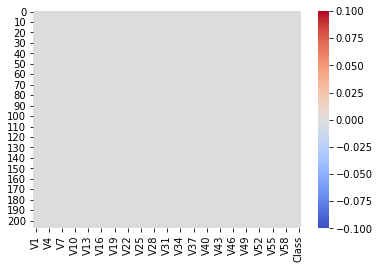

In [5]:
sns.heatmap(df.isna(), cmap = 'coolwarm')
plt.show()

The above plot shows only netural values which means no NAN values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [7]:
df.describe()

V1          V2          V3          V4          V5          V6  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               V7          V8          V9         V10  ...         V52  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.013420   
std      0.061788    0.085152    0.118387    0.134416  ...    0.009634   
min      0.003300    0.005500    0.007500    0.011300  ...    0.000800   
25%      0.080900    0.080425    0.097025    0.111275  ...    0.007275   
50%      0.106950    0.112100    0.152250    0.182400  ...    0.011400   
75%      0.154000    0.169600    0.233425    0.268700  ...    0.016725   
max      0.372900    0.459000    0.682800    0.710600  ...    0.070900   

              V53         V54         V55         V56         V57         V58  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.010709    0.010941    0.009290    0.008222    0.007820    0.007949   
std      0.007060    0.007301    0.007088    0.005736    0.005785    0.006470   
min      0.000500    0.001000    0.000600    0.000400    0.000300    0.000300   
25%      0.005075    0.005375    0.004150    0.004400    0.003700    0.003600   
50%      0.009550    0.009300    0.007500    0.006850    0.005950    0.005800   
75%      0.014900    0.014500    0.012100    0.010575    0.010425    0.010350   
max      0.039000    0.035200    0.044700    0.039400    0.035500    0.044000   

              V59         V60       Class  
count  208.000000  208.000000  208.000000  
mean     0.007941    0.006507    0.466346  
std      0.006181    0.005031    0.500070  
min      0.000100    0.000600    0.000000  
25%      0.003675    0.003100    0.000000  
50%      0.006400    0.005300    0.000000  
75%      0.010325    0.008525    1.000000  
max      0.036400    0.043900    1.000000  

[8 rows x 61 columns]

In [8]:
des=pd.DataFrame(df.describe())
des.iloc[[1,5,6,7]]

V1        V2        V3        V4        V5        V6        V7  \
mean  0.029164  0.038437  0.043832  0.053892  0.075202  0.104570  0.121747   
50%   0.022800  0.030800  0.034300  0.044050  0.062500  0.092150  0.106950   
75%   0.035550  0.047950  0.057950  0.064500  0.100275  0.134125  0.154000   
max   0.137100  0.233900  0.305900  0.426400  0.401000  0.382300  0.372900   

            V8        V9       V10  ...       V52       V53       V54  \
mean  0.134799  0.178003  0.208259  ...  0.013420  0.010709  0.010941   
50%   0.112100  0.152250  0.182400  ...  0.011400  0.009550  0.009300   
75%   0.169600  0.233425  0.268700  ...  0.016725  0.014900  0.014500   
max   0.459000  0.682800  0.710600  ...  0.070900  0.039000  0.035200   

          V55       V56       V57       V58       V59       V60     Class  
mean  0.00929  0.008222  0.007820  0.007949  0.007941  0.006507  0.466346  
50%   0.00750  0.006850  0.005950  0.005800  0.006400  0.005300  0.000000  
75%   0.01210  0.010575  0.010425  0.010350  0.010325  0.008525  1.000000  
max   0.04470  0.039400  0.035500  0.044000  0.036400  0.043900  1.000000  

[4 rows x 61 columns]

# key observation:
     1. The mean is Higher than the median (50th percentile) in all columns. 
     2. There is a large difference in 75th percentile and max.
     3. The first and second observation suggest that there are outliers and skewness present.

In [9]:
Class=pd.DataFrame(df.Class.replace((1,0),("Rocks","Mines")))
Class.Class.value_counts()

Mines    111
Rocks     97
Name: Class, dtype: int64

                          WE HAVE 111 ROWS FOR MINES AND 97 ROWS FOR ROCKS

In [10]:
x=df.drop(["Class"], axis = 1)
y=df.Class

#         Skewness identification:

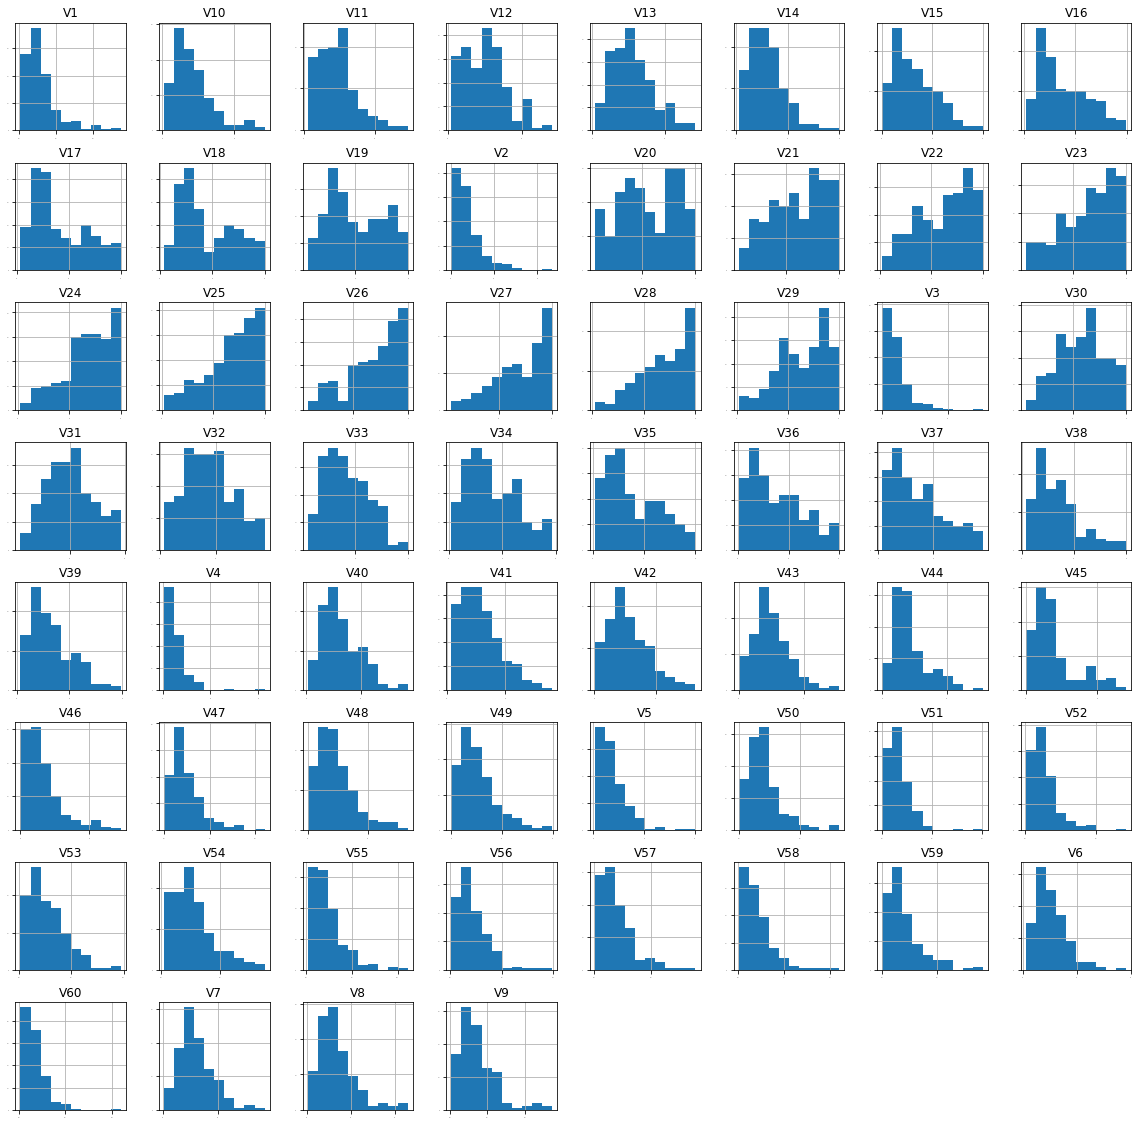

In [11]:
x.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(20,20))
plt.show()

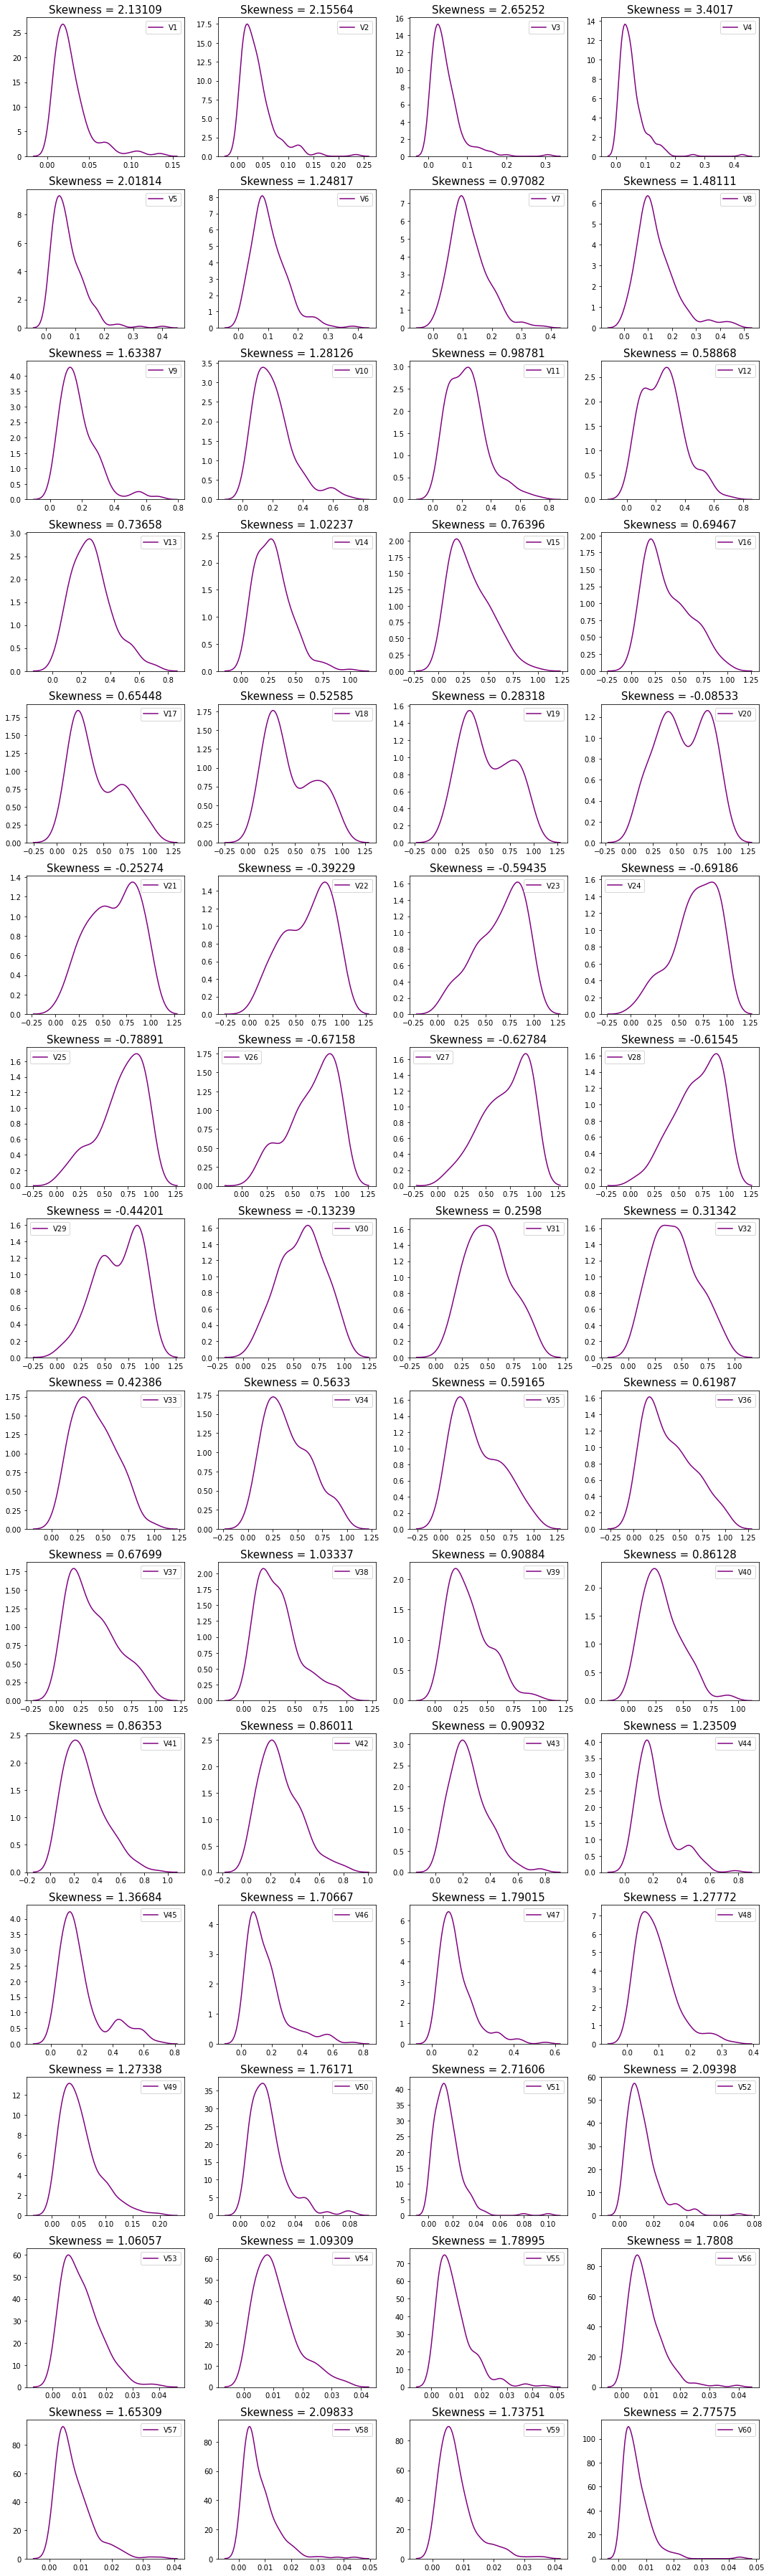

In [12]:
plt.figure(figsize=(15,50))
collist = x.columns.values
for i in range (0, len(collist)):
    plt.subplot(15,4,i+1)         
    sns.kdeplot(x[collist[i]], color = "purple")
    plt.title(f"Skewness = {round(x[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

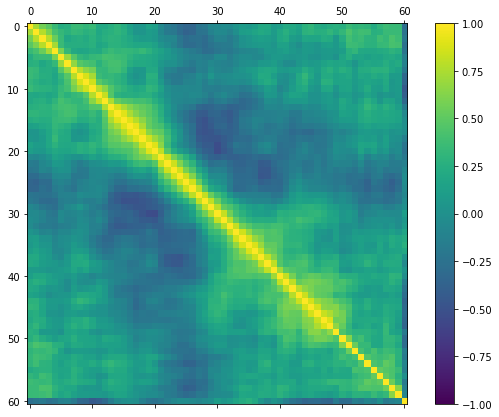

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,7)
plt.show()

In [14]:
skewness=[]
for i in x.skew().values:
    skewness.append(i)
    
x_skewness= pd.DataFrame({"Feature_names": collist,"Skew": skewness})
x_skewness= x_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in x_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
x_skewness
 

Feature_names      Skew
0             V4  3.401697
1            V60  2.775754
2            V51  2.716060
3             V3  2.652518
4             V2  2.155644
5             V1  2.131088
6            V58  2.098330
7            V52  2.093976
8             V5  2.018141
9            V47  1.790155
10           V55  1.789946
11           V56  1.780805
12           V50  1.761714
13           V59  1.737506
14           V46  1.706674
15           V57  1.653090
16            V9  1.633870
17            V8  1.481107
18           V45  1.366839
19           V10  1.281258
20           V48  1.277722
21           V49  1.273385
22            V6  1.248166
23           V44  1.235086
24           V54  1.093090
25           V53  1.060572
26           V38  1.033366
27           V14  1.022369
28           V11  0.987813
29            V7  0.970820
30           V43  0.909317
31           V39  0.908835
32           V41  0.863526
33           V40  0.861280
34           V42  0.860110
35           V15  0.763964
36           V13  0.736584
37           V16  0.694671
38           V37  0.676994
39           V17  0.654480
40           V36  0.619868
41           V35  0.591654
42           V12  0.588681
43           V34  0.563296
44           V18  0.525845
45           V33  0.423864
46           V32  0.313420
47           V19  0.283182
48           V31  0.259797
49           V20 -0.085331
50           V30 -0.132390
51           V21 -0.252741
52           V22 -0.392289
53           V29 -0.442007
54           V23 -0.594350
55           V28 -0.615447
56           V27 -0.627843
57           V26 -0.671580
58           V24 -0.691861
59           V25 -0.788909

In [15]:
print("\n\nFeature names with Skewness is present more than +/-0.5 as follows:\n","\n\nPostive Skewed data:\n", skew_postive_row,"\n\nnegative Skewed data:\n", skew_negative_row)       



Feature names with Skewness is present more than +/-0.5 as follows:
 

Postive Skewed data:
 ['V4', 'V60', 'V51', 'V3', 'V2', 'V1', 'V58', 'V52', 'V5', 'V47', 'V55', 'V56', 'V50', 'V59', 'V46', 'V57', 'V9', 'V8', 'V45', 'V10', 'V48', 'V49', 'V6', 'V44', 'V54', 'V53', 'V38', 'V14', 'V11', 'V7', 'V43', 'V39', 'V41', 'V40', 'V42', 'V15', 'V13', 'V16', 'V37', 'V17', 'V36', 'V35', 'V12', 'V34', 'V18'] 

negative Skewed data:
 ['V23', 'V28', 'V27', 'V26', 'V24', 'V25']


##### Since the nature of the data itself is skewed we have to do the analysis without removing the skewness.

In [16]:
print("The Over all Skewness of the data :", x.skew().mean())

The Over all Skewness of the data : 0.9672196487827528


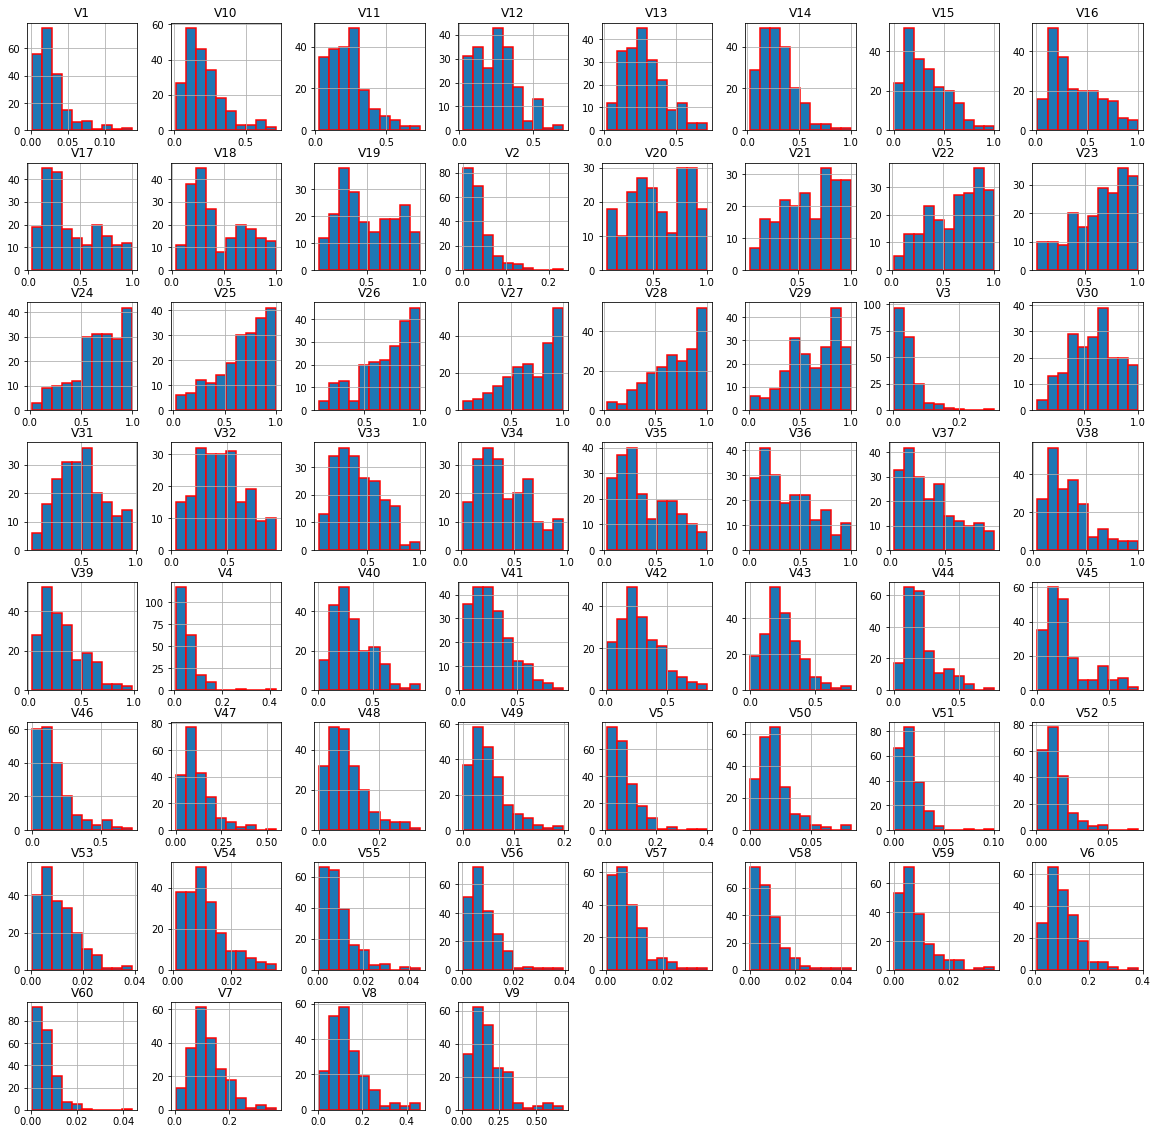

In [17]:
x.hist(edgecolor="red",linewidth= 1.5, figsize= (20,20))
plt.show()

# Lets Identify the Outliers

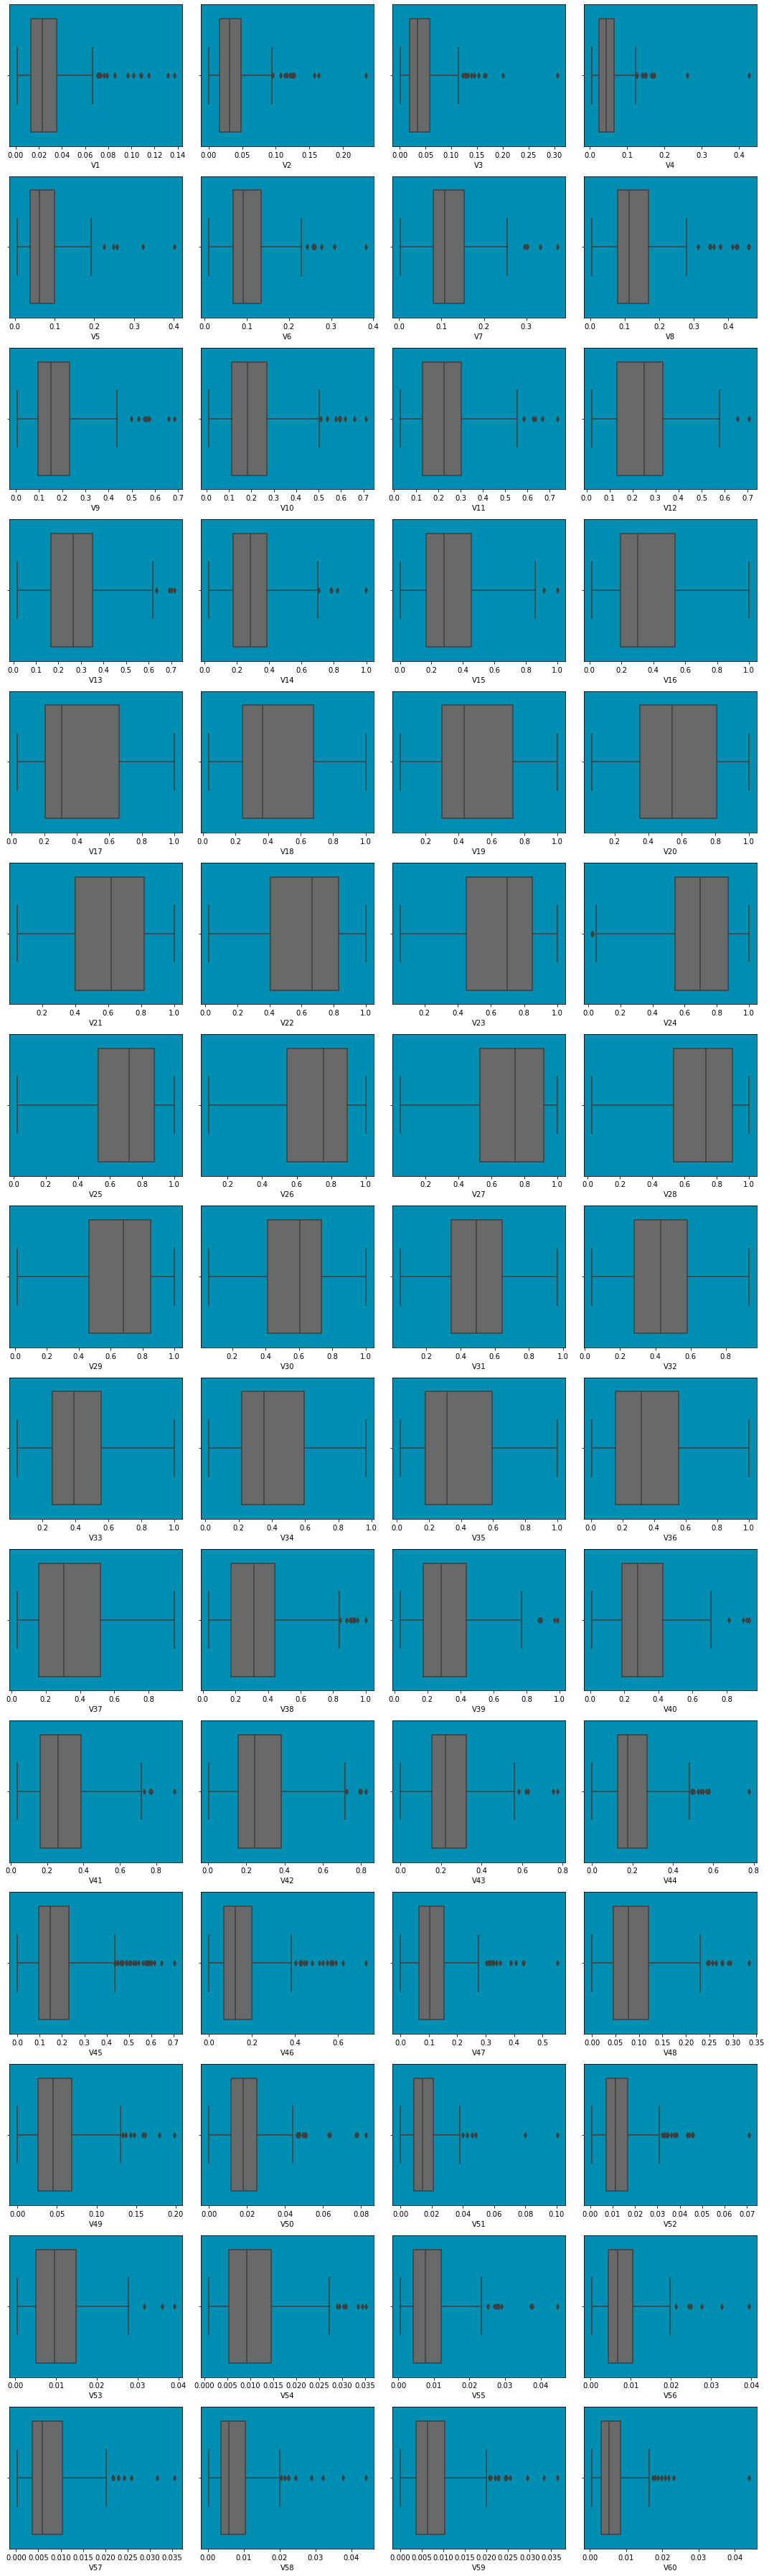

In [18]:
plt.figure(figsize=(15,50))
collist = x.columns.values
for i in range (0, len(collist)):
    plt.subplot(15,4,i+1)
    ax=sns.boxplot(x[collist[i]], color = "#696969" , orient = "h")
    ax.set_facecolor("#008fb3")
    plt.tight_layout()

### From the above observation its evident that the data have more outliers lets try in removing the outliers.

In [19]:
x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60'],
      dtype='object')

In [20]:
import itertools

cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60']

length = len(cols)

Rock_Or_Bomb = ['#7a937d','#758f79','#718b74','#6d8771','#69826d','#667e69','#627965','#5e7561','#5b705e','#576c5a','#546756',
                '#506352','#4c5e4f','#495a4b','#455547','#415143','#3e4c40','#3a483c','#364338','#333f34','#2f3a30','#2b362d',
                '#506352','#4c5e4f','#495a4b','#455547','#415143','#3e4c40','#3a483c','#364338','#333f34','#2f3a30','#2b362d',
                '#283129','#242d25','#202821','#1d241e','#3e4c40','#3a483c','#364338','#333f34','#2f3a30','#2b362d','#283129',
                '#3e4c40','#3a483c','#364338','#333f34','#2f3a30','#2b362d','#283129','#242d25','#202821','#1d241e','#191f1a',
                '#151b16','#121612','#0e120f','#0a0d0b','#070907',]

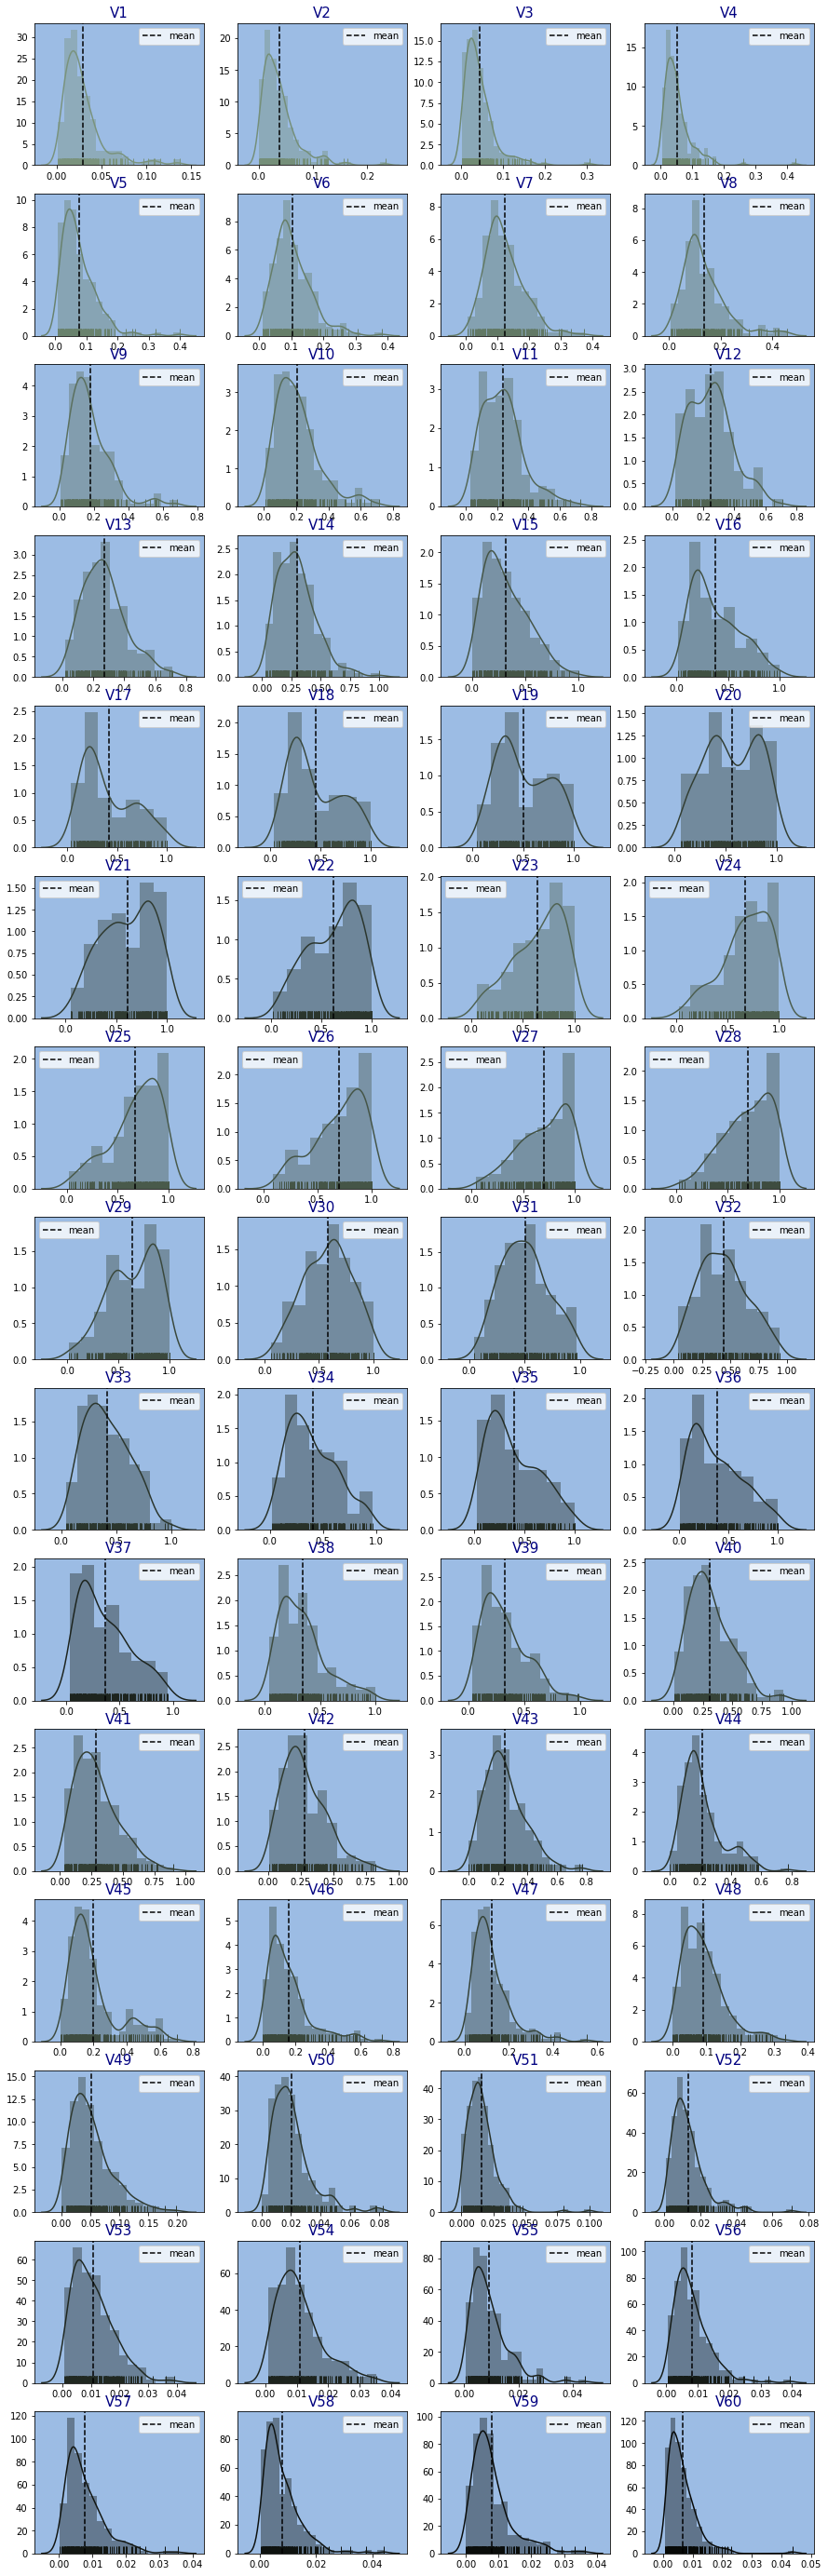

In [21]:
Deep_Ocean_color = "#008fb3"
lb= "#9cbce4"

plt.figure(figsize=(15,50))
for i,j,k in itertools.zip_longest(cols,range(length),Rock_Or_Bomb):
    plt.subplot(15,4,j+1)
    ax= sns.distplot(x[i],color=k,rug=True)
    ax.set_facecolor(lb)
    plt.axvline(x[i].mean(), linestyle="dashed", label= "mean", color= "k")
    plt.legend(loc="best")
    plt.title(i,color = "navy", fontsize = 15)
    plt.xlabel("")


# Outliers

In [22]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold= 3
df_new = df[(z < 3).all(axis=1)]

In [23]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((208-168)/208)*100}%")

Orginal Data (208, 61)
After Removing outliers (168, 61)
The percentage of data loss 19.230769230769234%


##### Post the Removal of outliers the loss of data is more lets try with IQR method

In [24]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df_new1

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

        V10  ...     V52     V53     V54     V55     V56     V57     V58  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
7    0.2838  ...  0.0081  0.0120  0.0045  0.0121  0.0097  0.0085  0.0047   
8    0.1487  ...  0.0145  0.0128  0.0145  0.0058  0.0049  0.0065  0.0093   
9    0.0251  ...  0.0090  0.0223  0.0179  0.0084  0.0068  0.0032  0.0035   
10   0.0452  ...  0.0062  0.0120  0.0052  0.0056  0.0093  0.0042  0.0003   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

        V59     V60  Class  
0    0.0090  0.0032      1  
7    0.0048  0.0053      1  
8    0.0059  0.0022      1  
9    0.0056  0.0040      1  
10   0.0053  0.0036      1  
..      ...     ...    ...  
203  0.0193  0.0157      0  
204  0.0062  0.0067      0  
205  0.0077  0.0031      0  
206  0.0036  0.0048      0  
207  0.0061  0.0115      0  

[134 rows x 61 columns]

In [25]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new1.shape}\nThe percentage of data loss {((208-134)/208)*100}%")

Orginal Data (208, 61)
After Removing outliers (134, 61)
The percentage of data loss 35.57692307692308%


##### The loss of data is 20% in Z-Score method and 35%  in IQR method which is pity bad and on removing the same will affect the performance of the data so we have to work with the outliers present in the data.

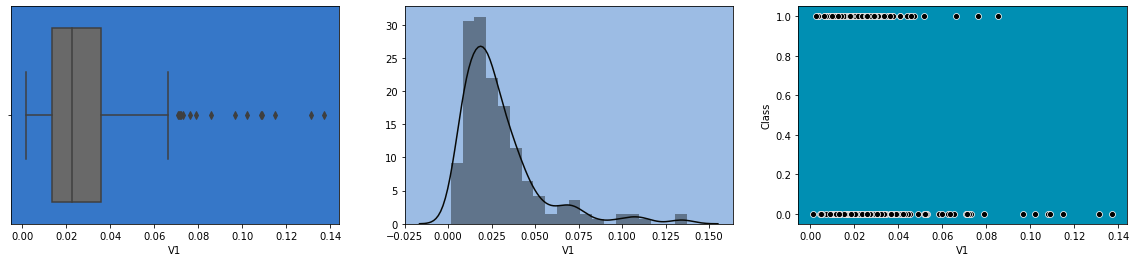

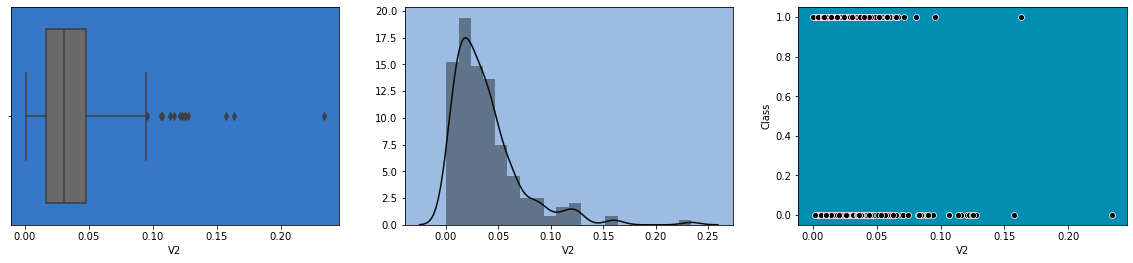

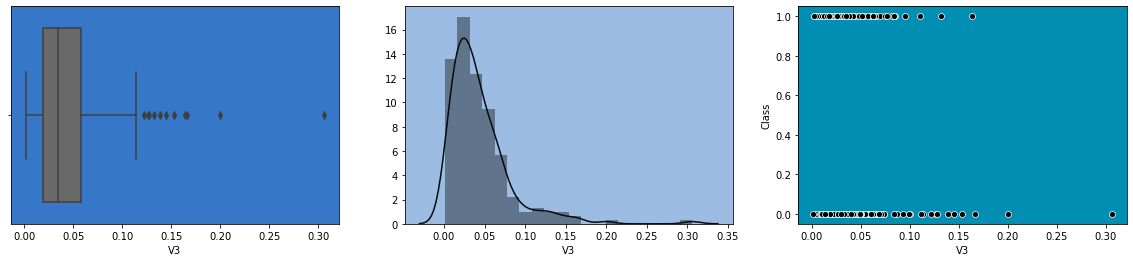

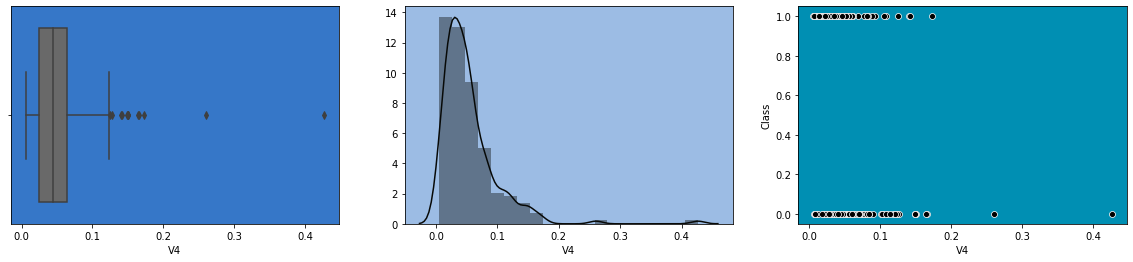

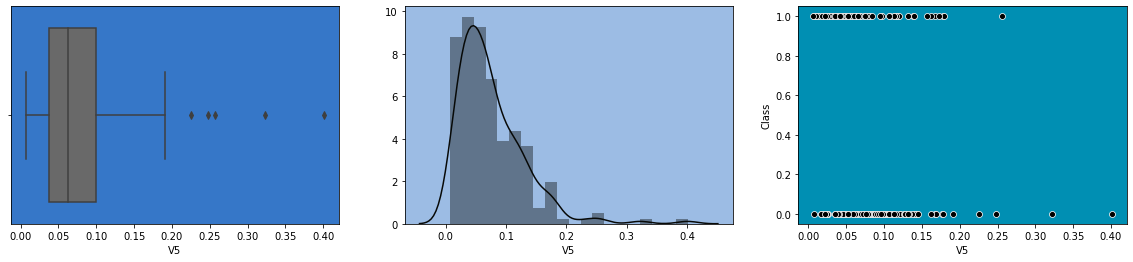

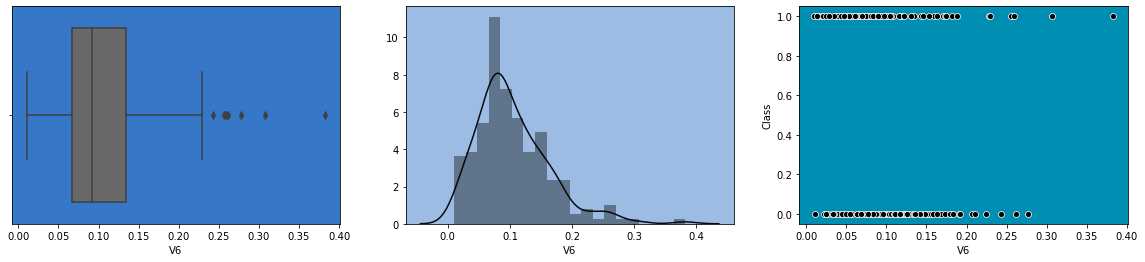

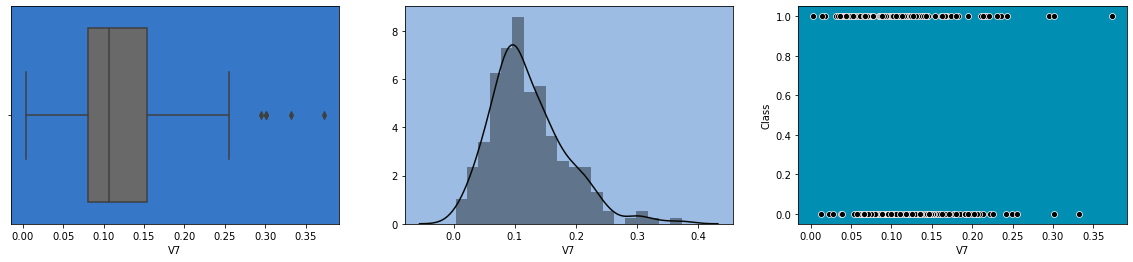

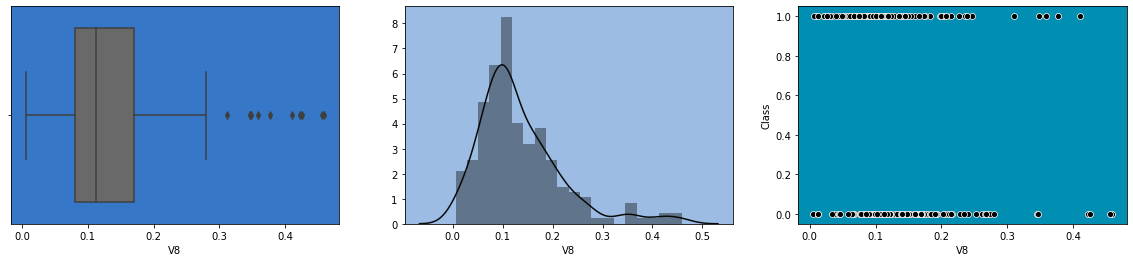

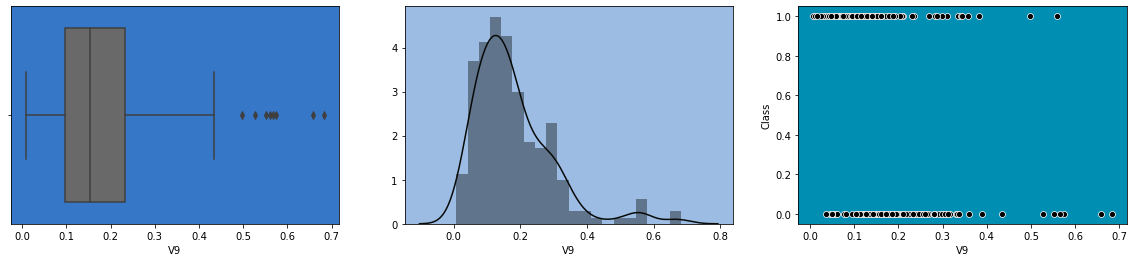

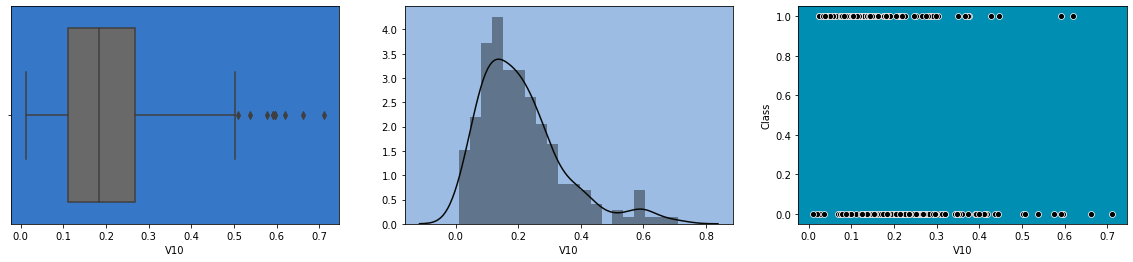

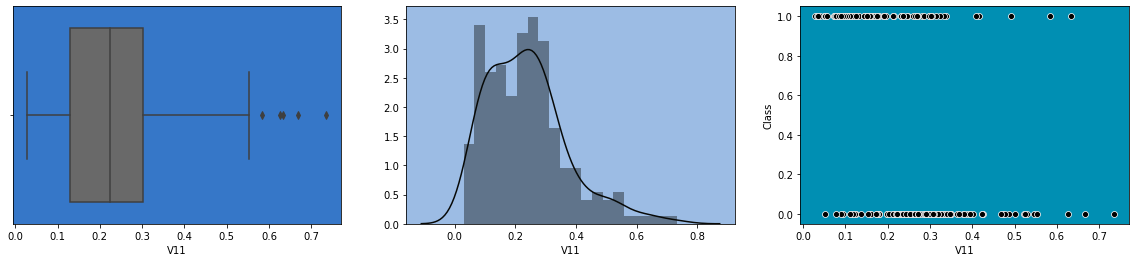

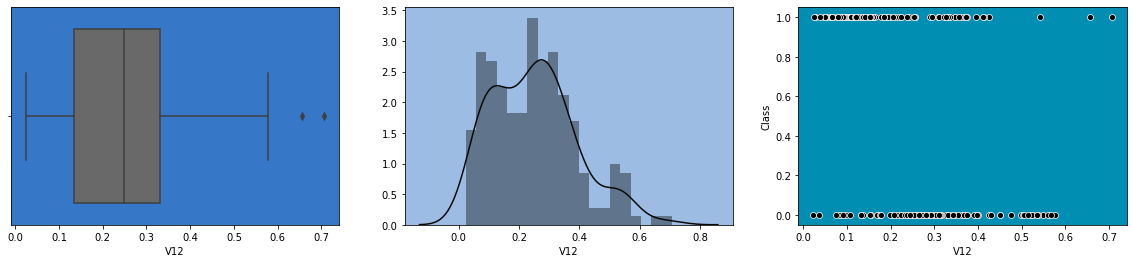

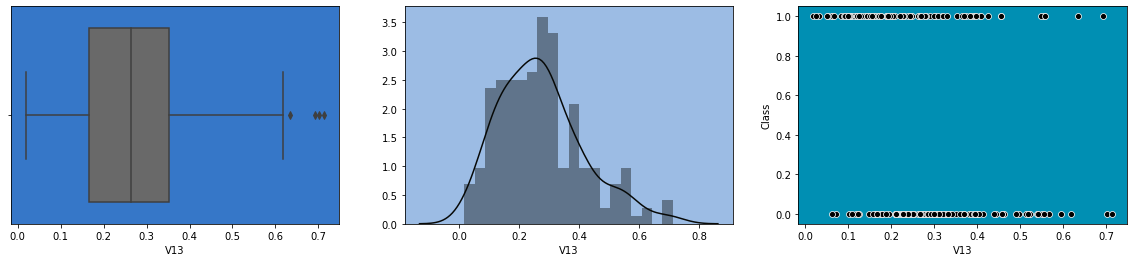

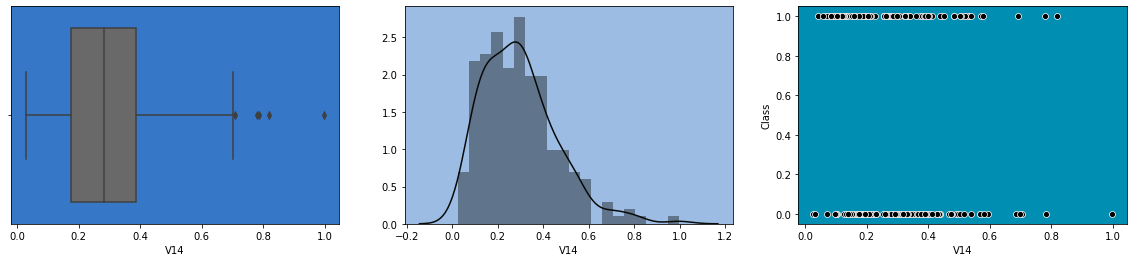

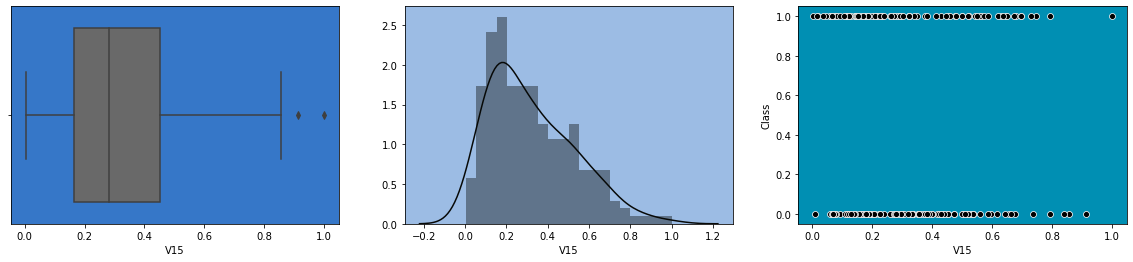

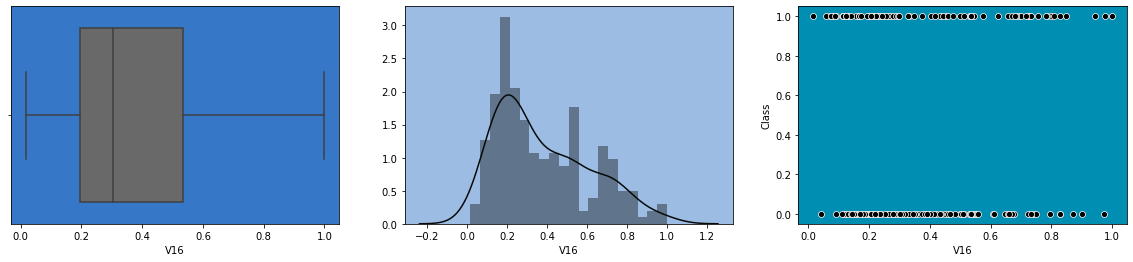

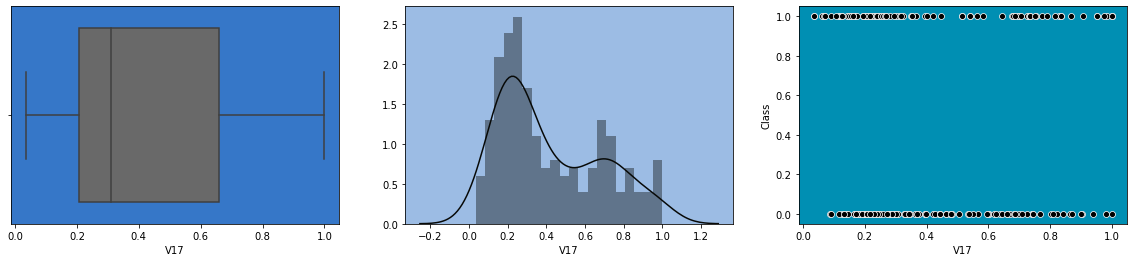

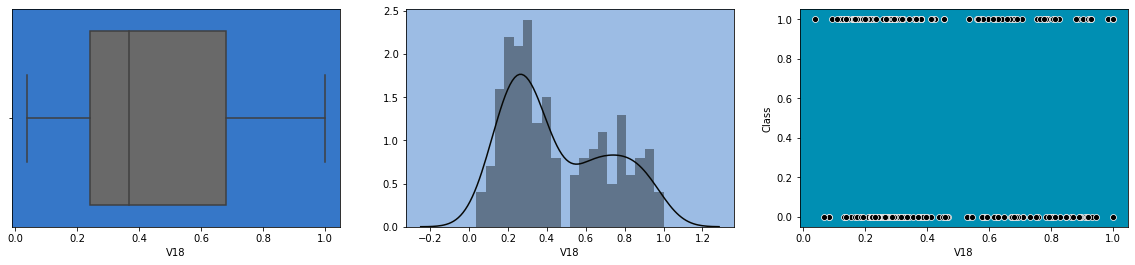

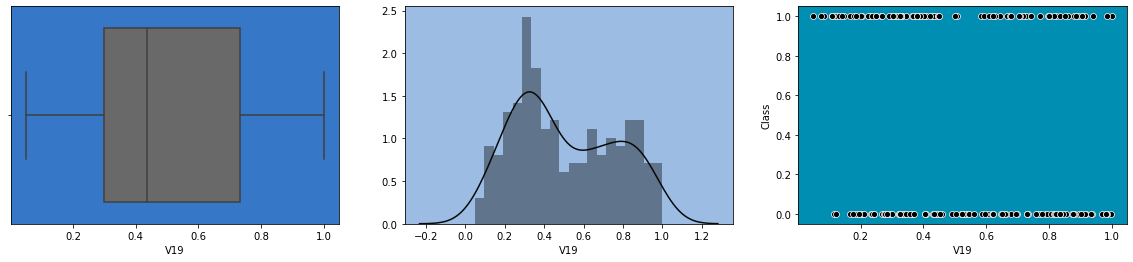

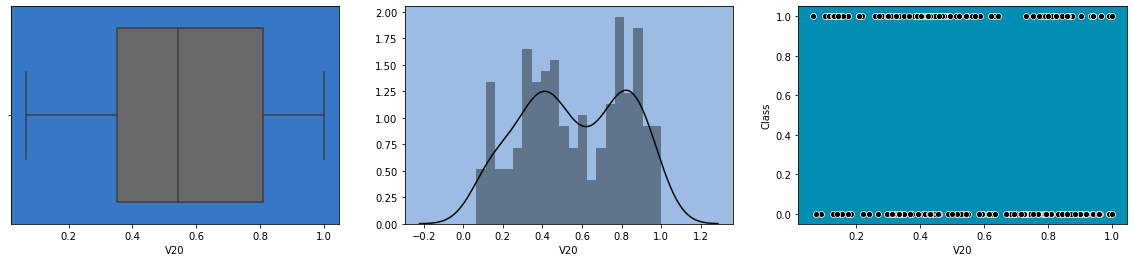

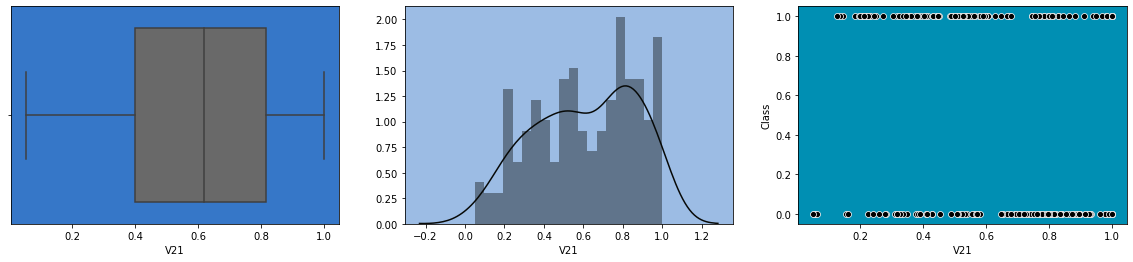

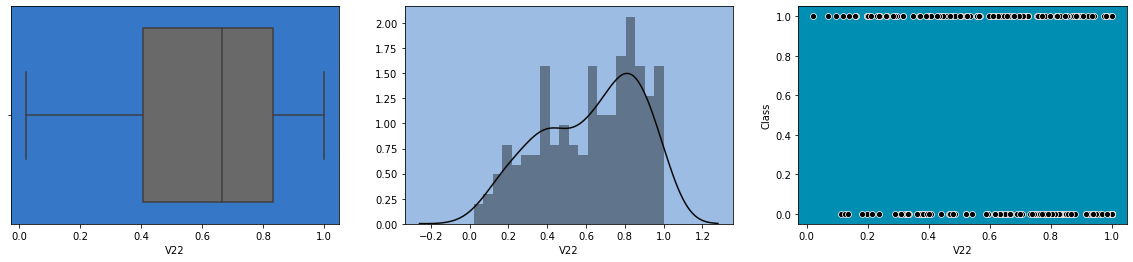

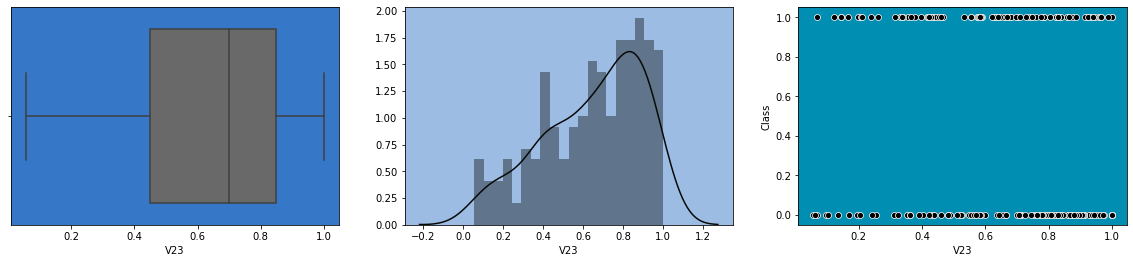

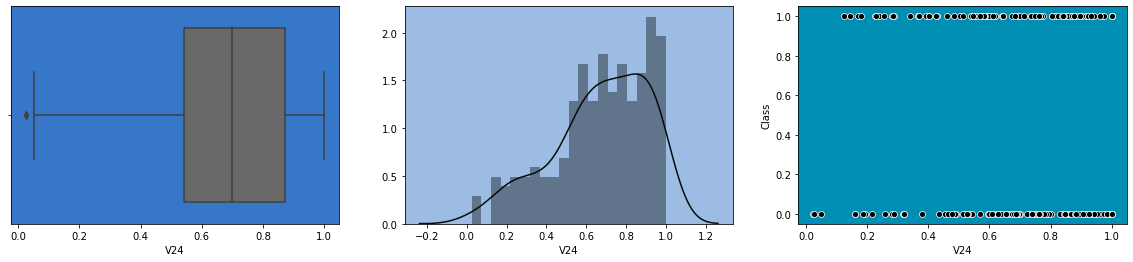

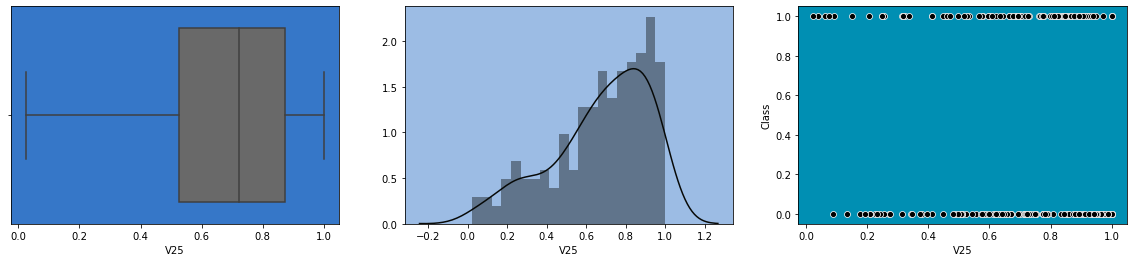

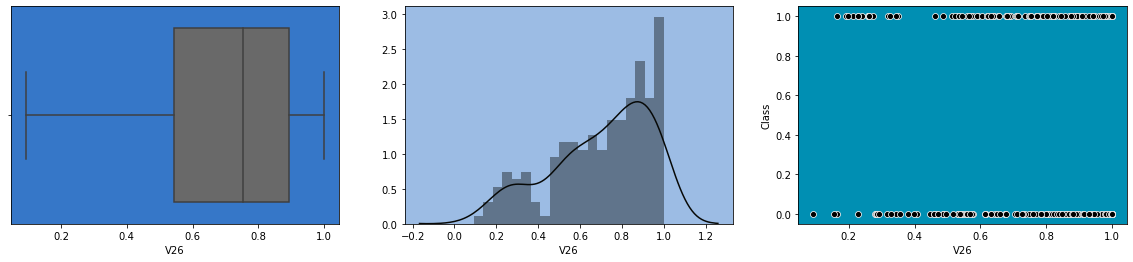

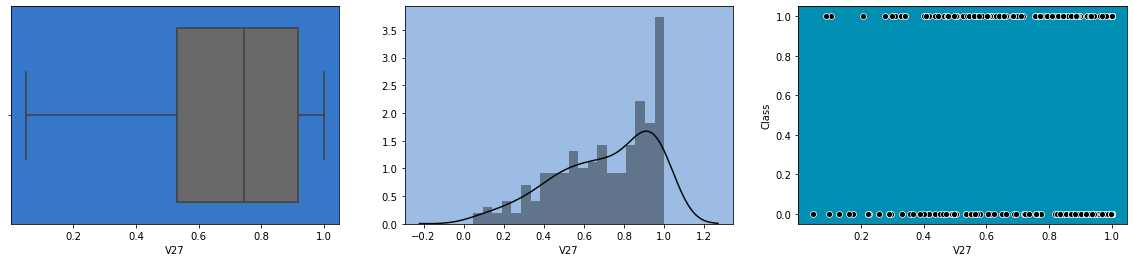

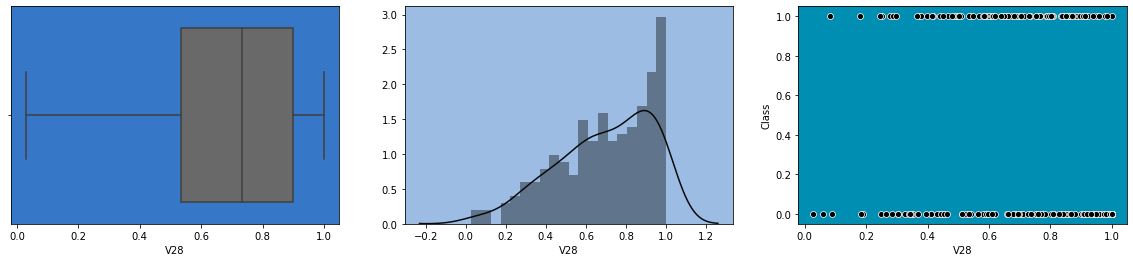

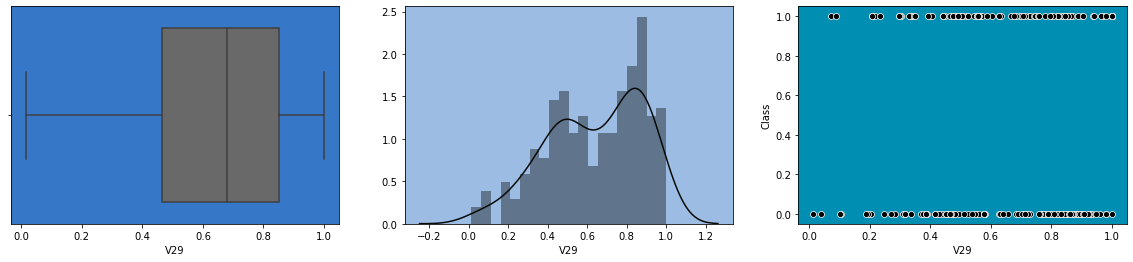

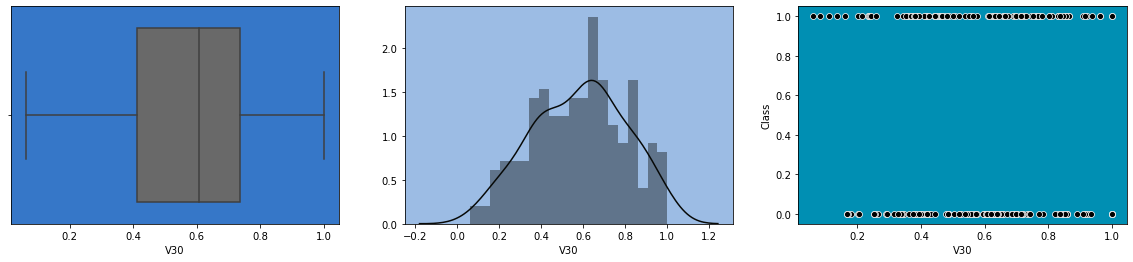

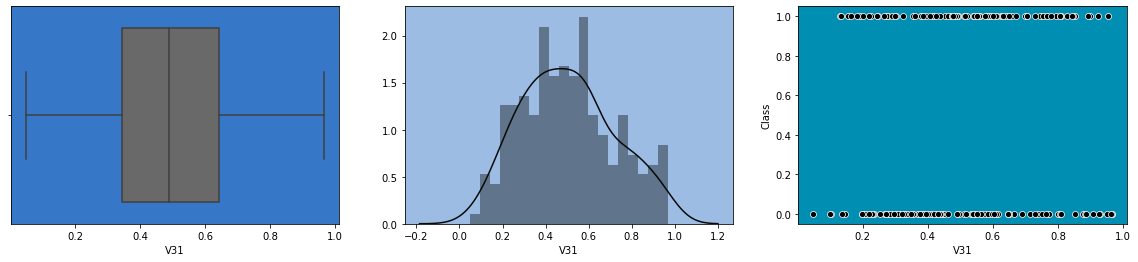

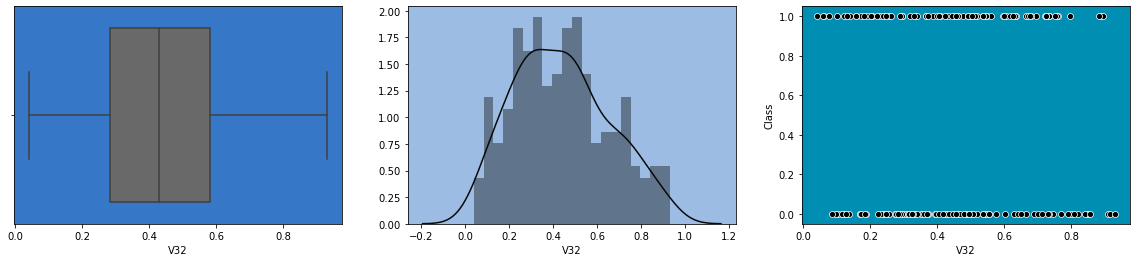

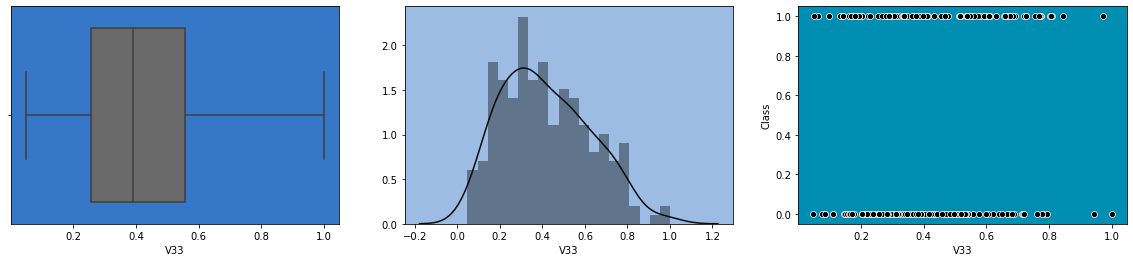

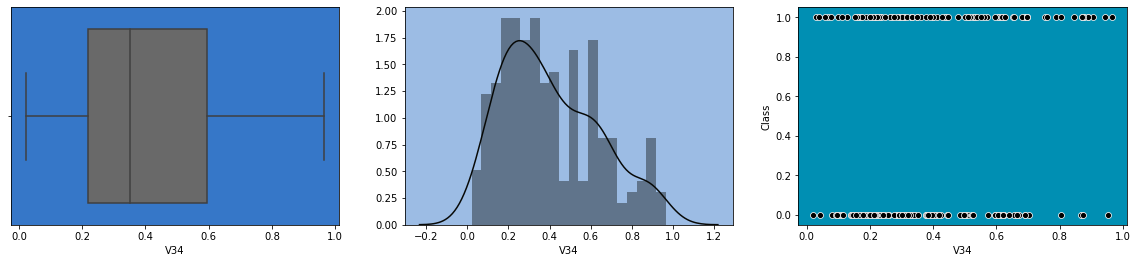

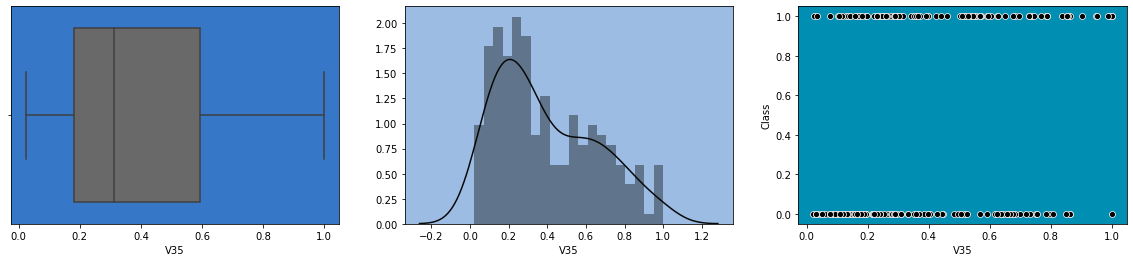

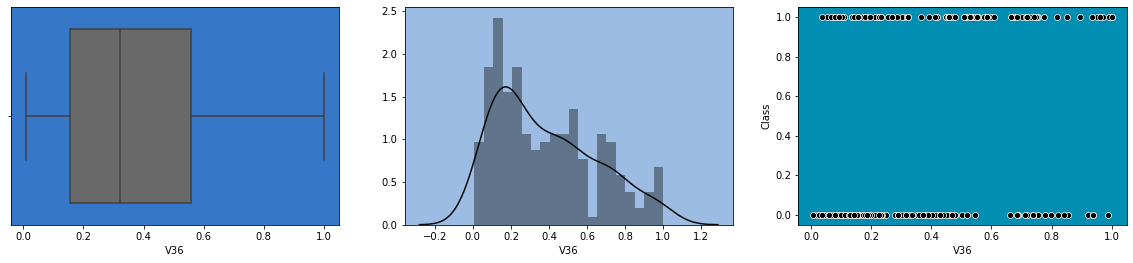

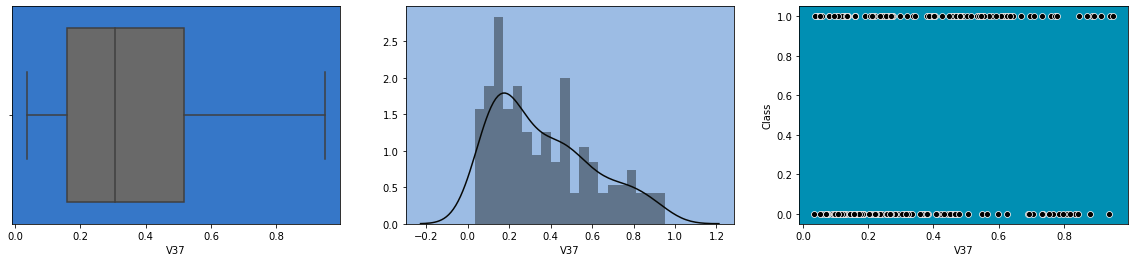

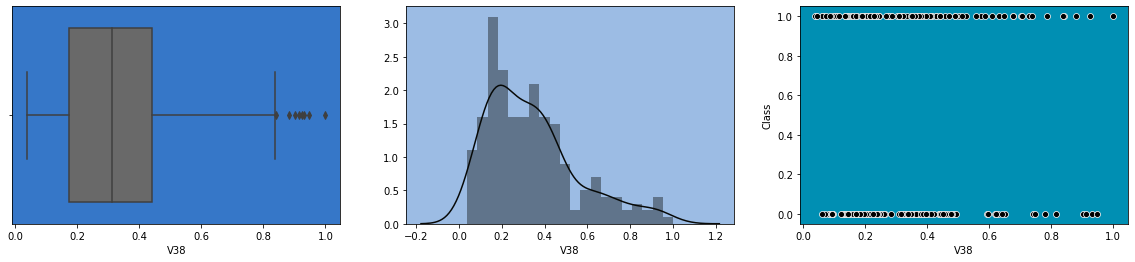

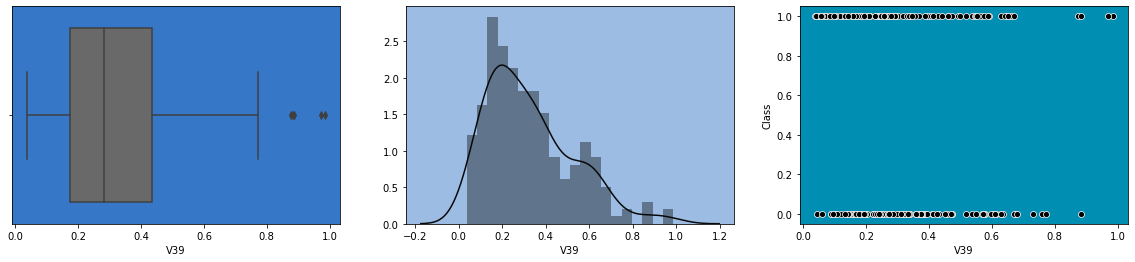

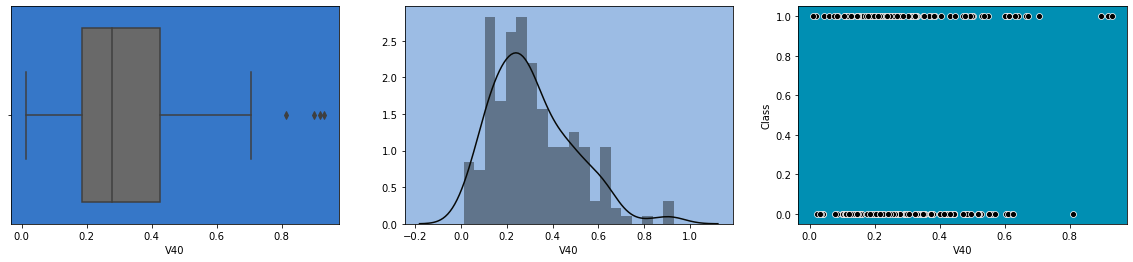

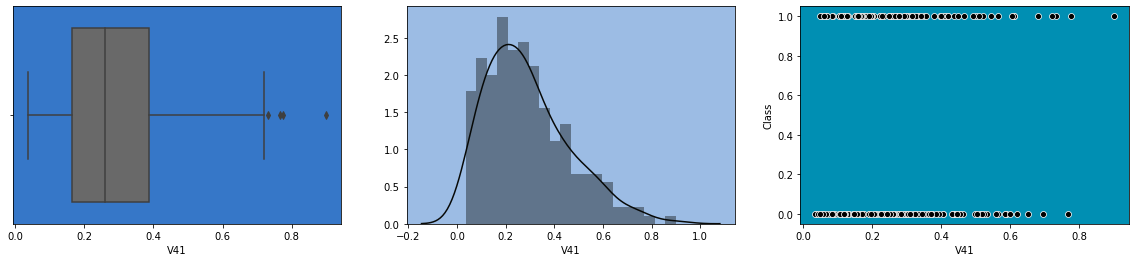

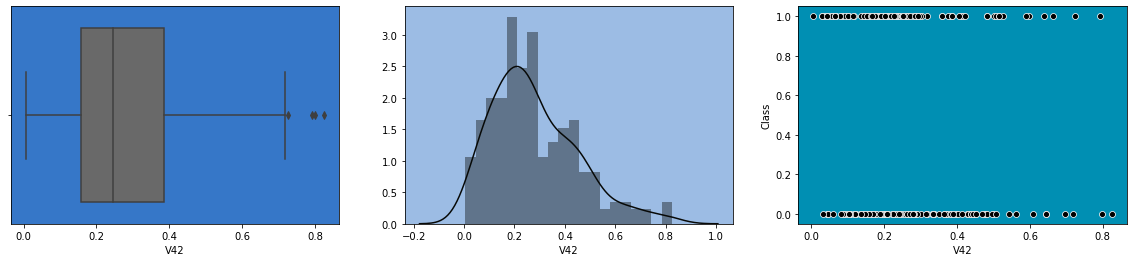

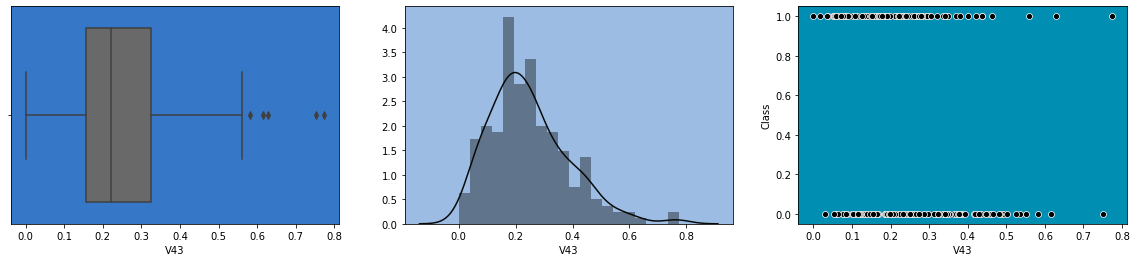

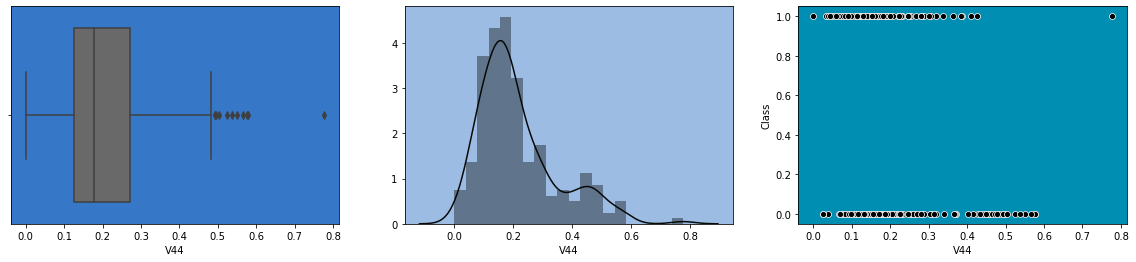

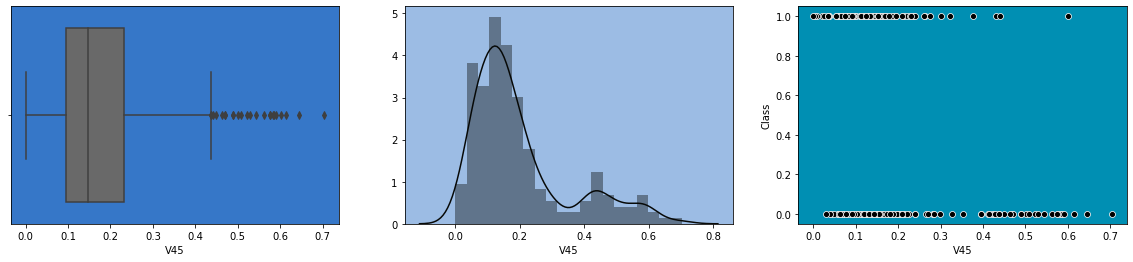

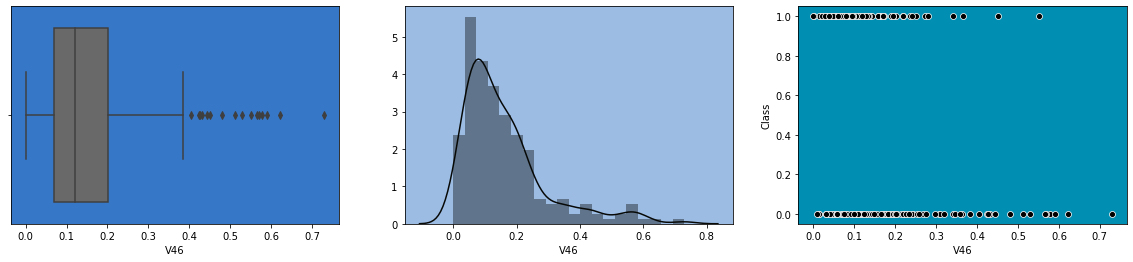

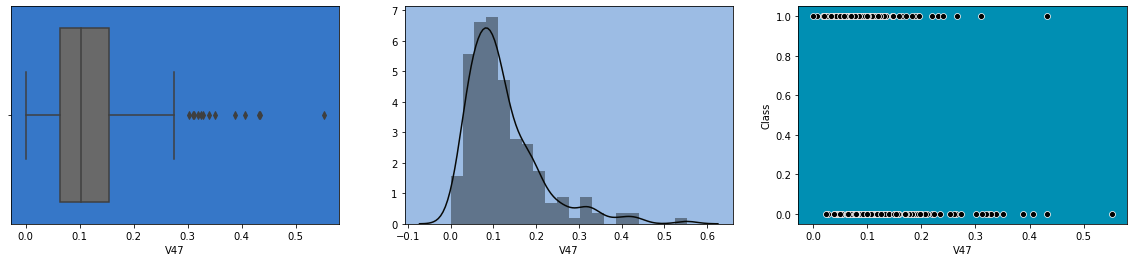

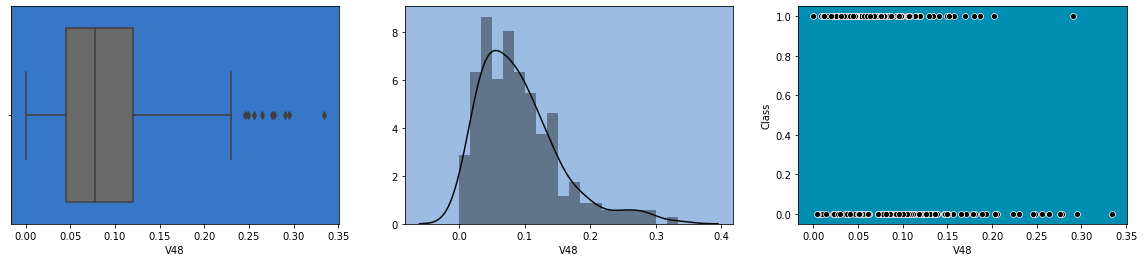

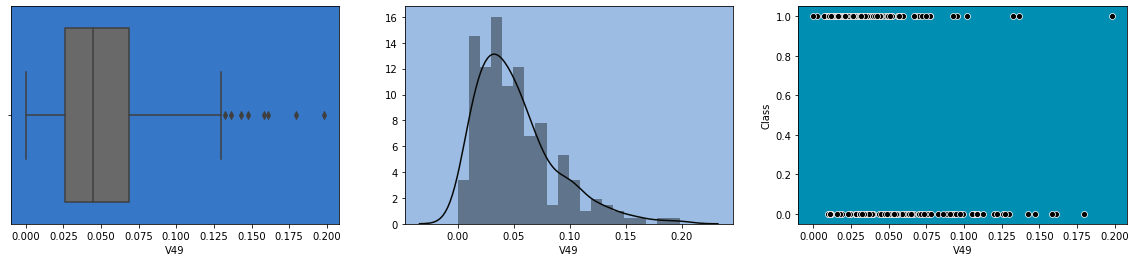

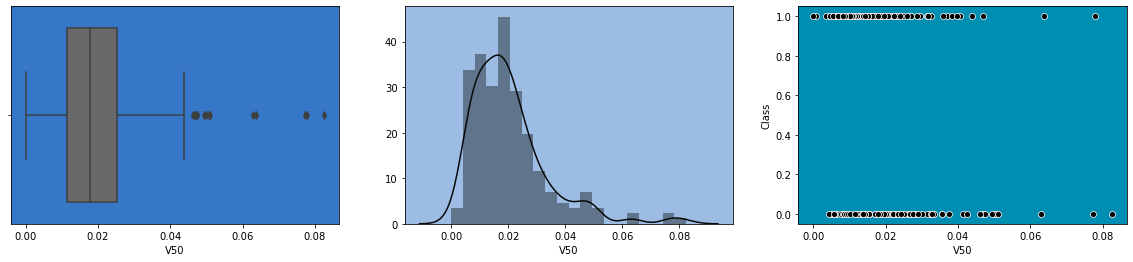

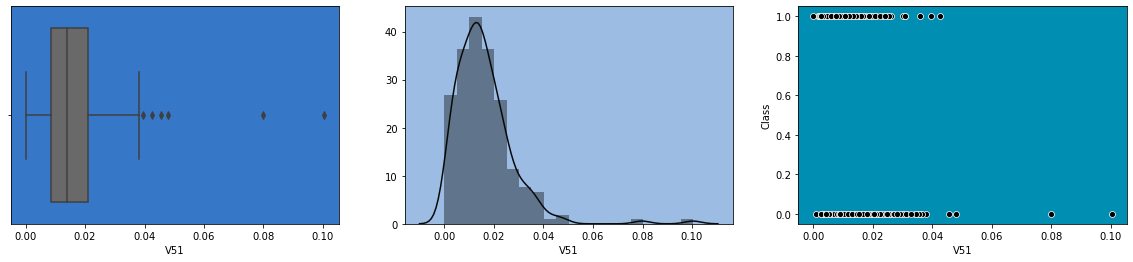

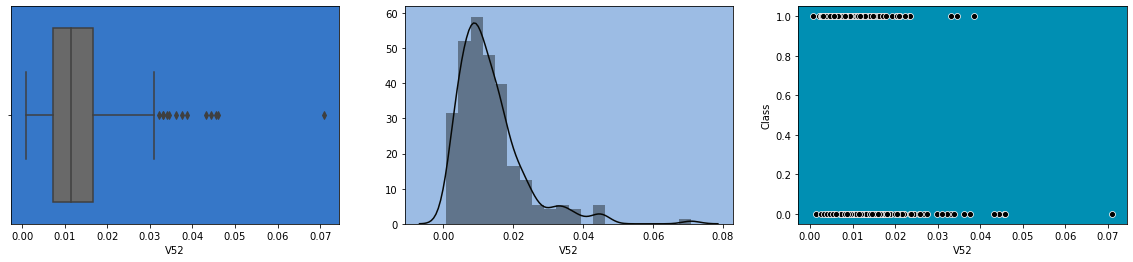

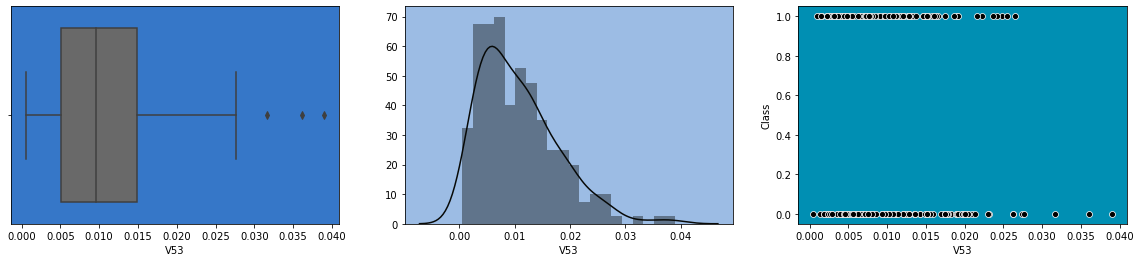

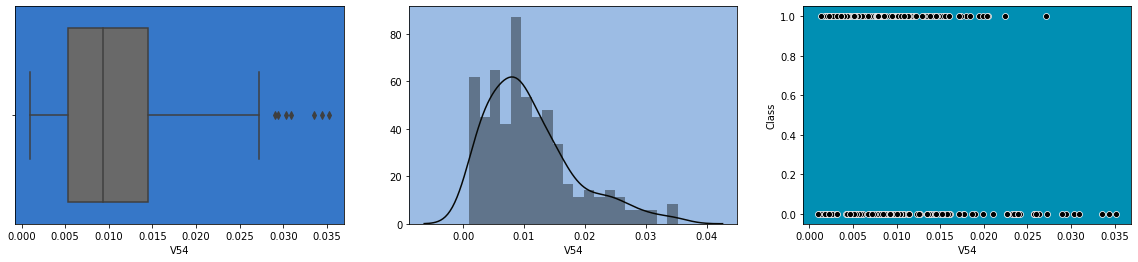

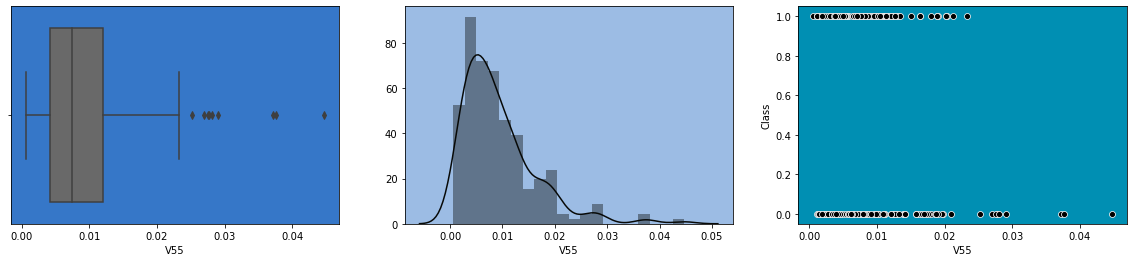

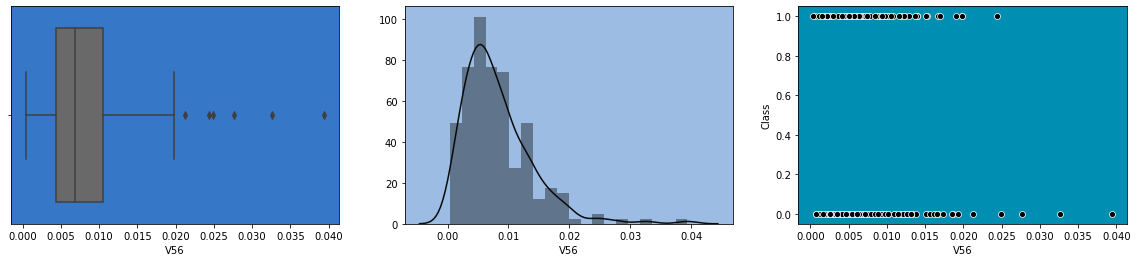

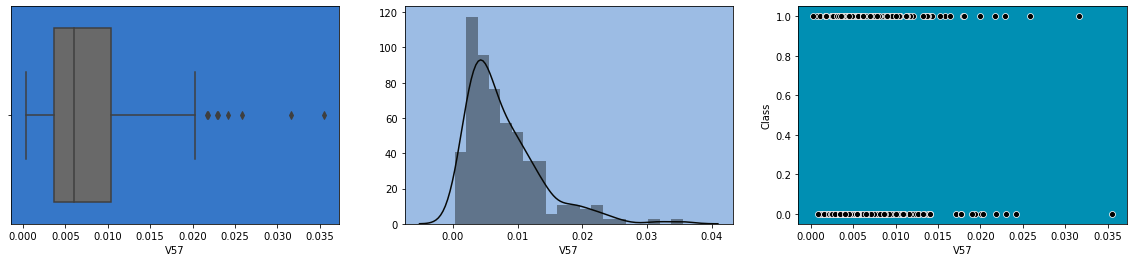

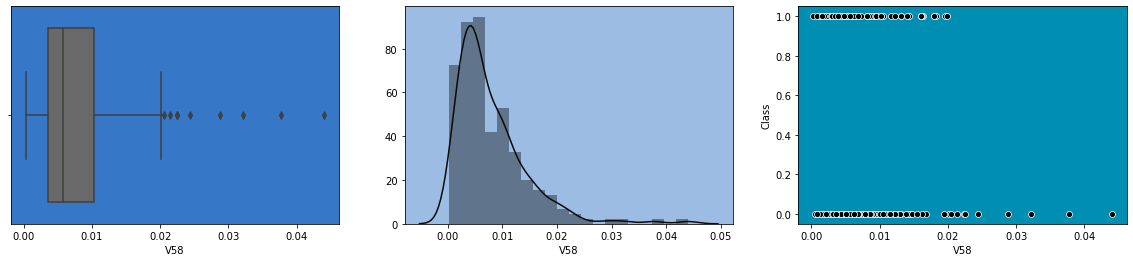

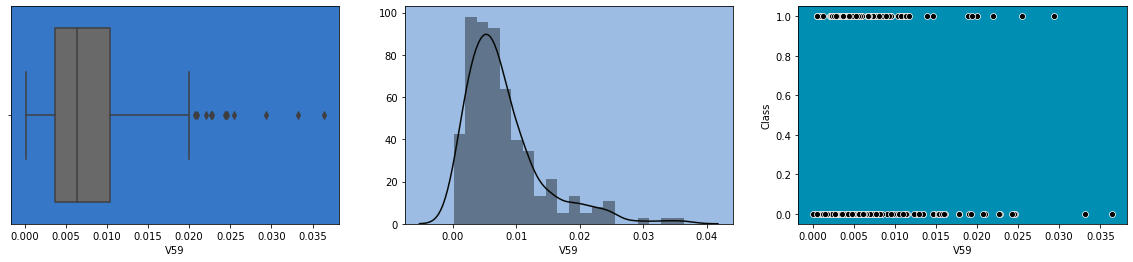

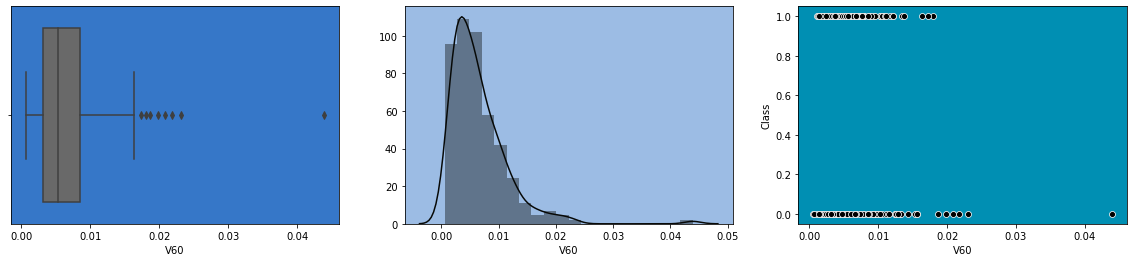

In [26]:
target_variable = "Class"
feature_variable = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60']

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    a1=sns.boxplot(x=x[feature_name], ax=axs[0], color="#696969")
    a1.set_facecolor("#3677c8")
    a2=sns.distplot(x[feature_name], bins=20, kde=True, ax=axs[1],color="#070907")
    a2.set_facecolor(lb)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable, ax=axs[2], color="k")
    a3.set_facecolor(Deep_Ocean_color)
    plt.show()
    
for i in feature_variable:
    num_plots(i)    

<Figure size 1080x3600 with 0 Axes>

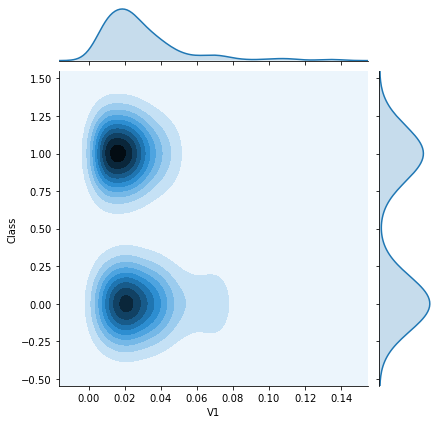

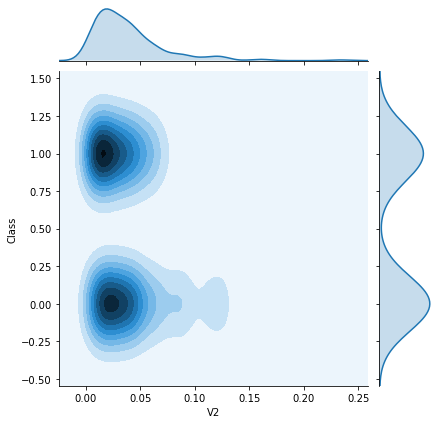

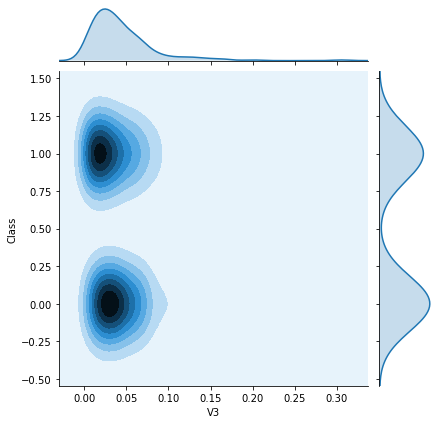

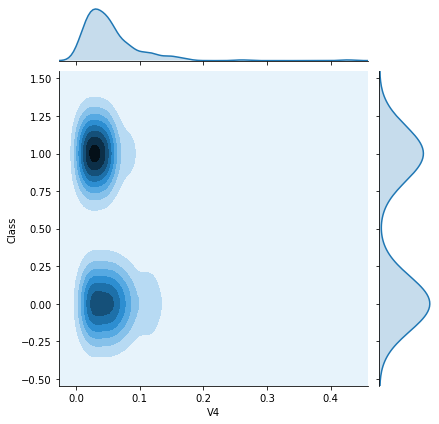

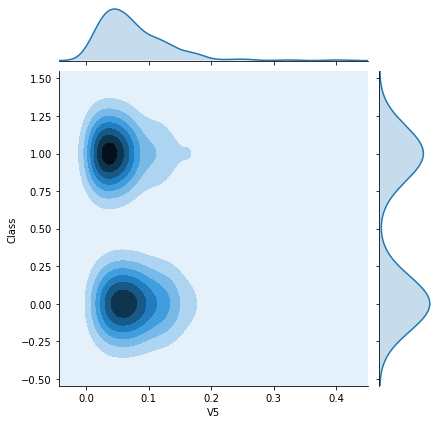

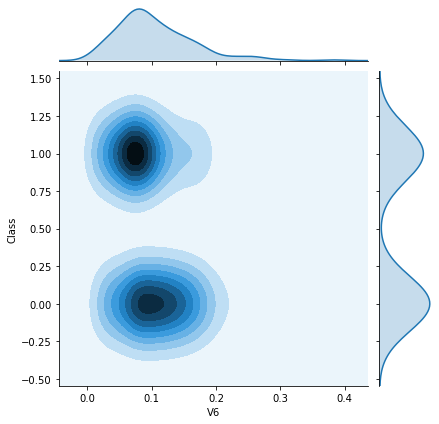

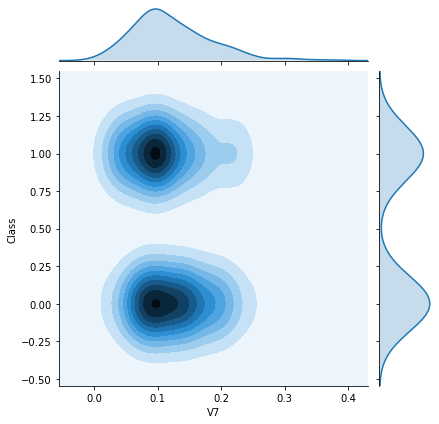

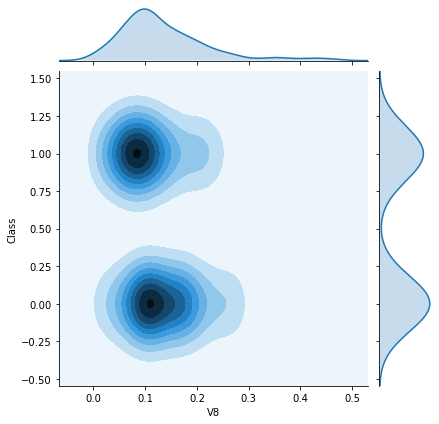

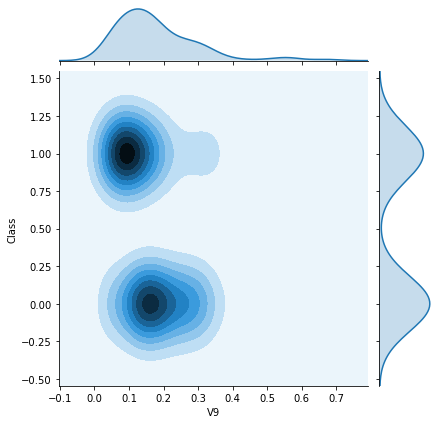

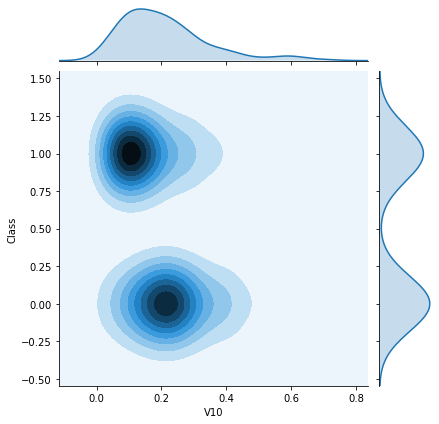

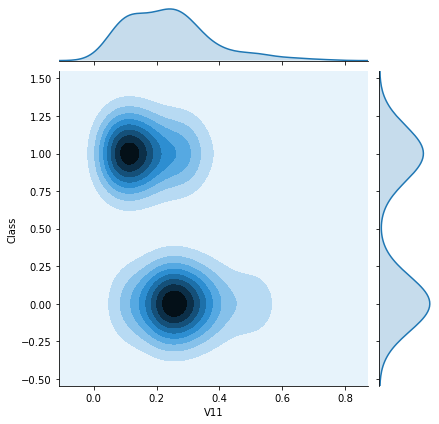

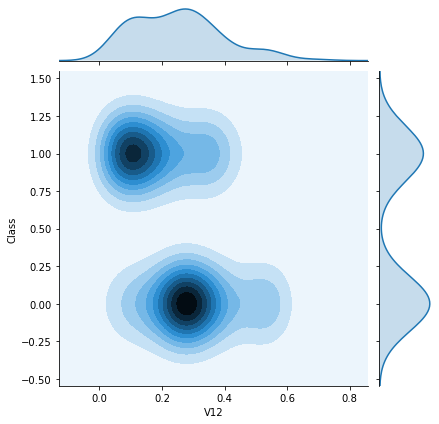

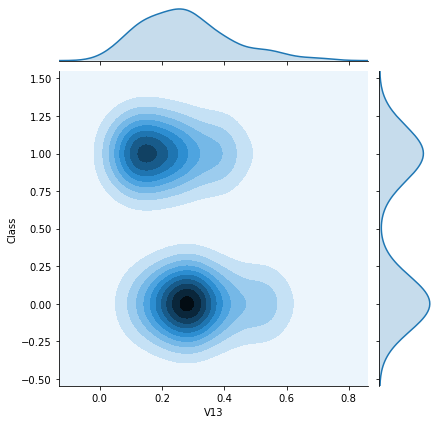

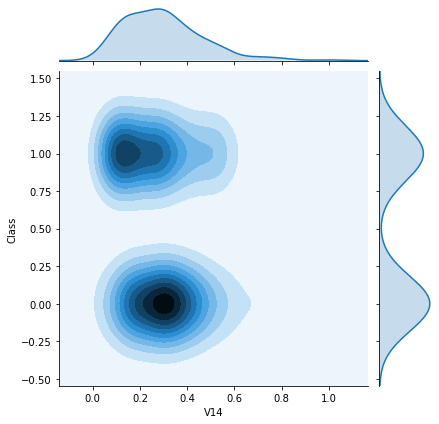

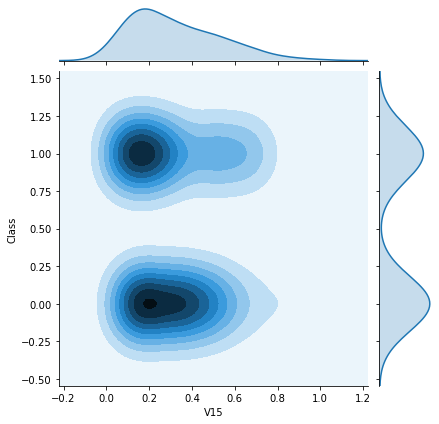

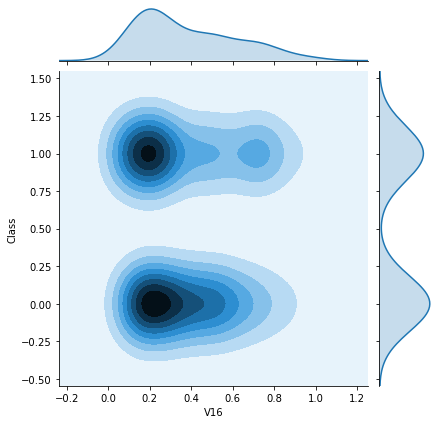

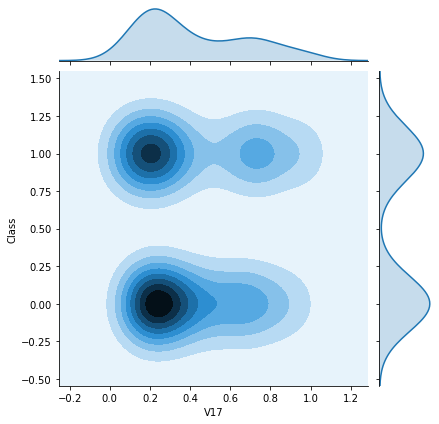

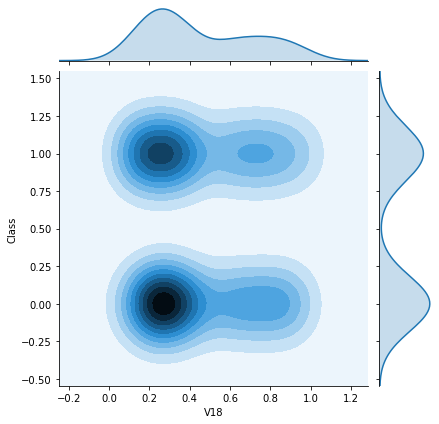

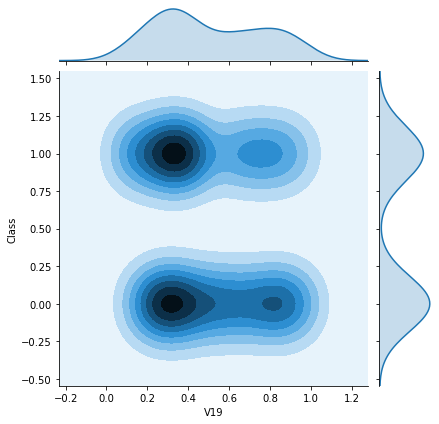

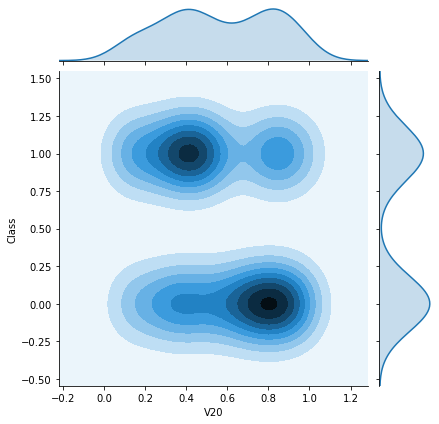

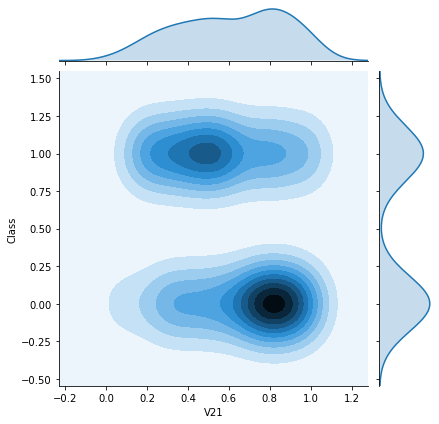

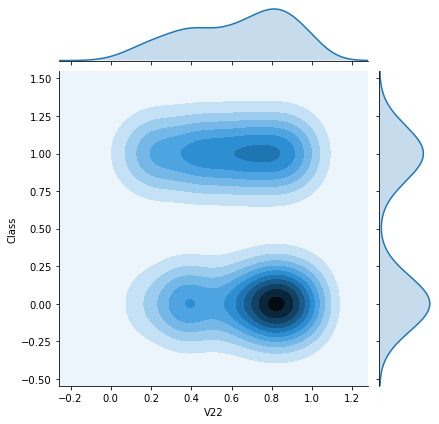

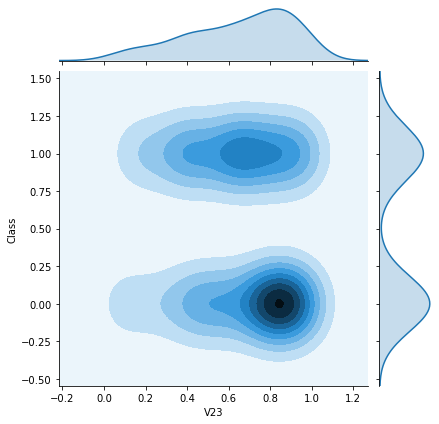

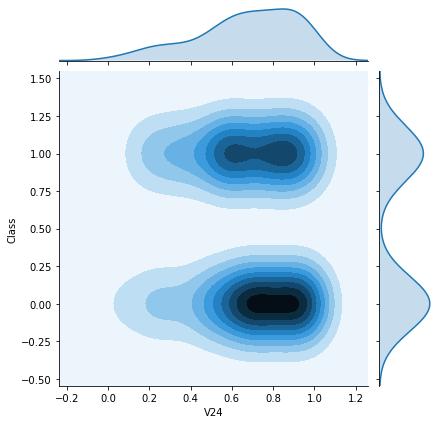

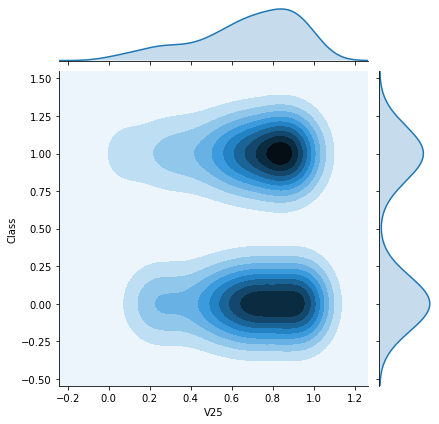

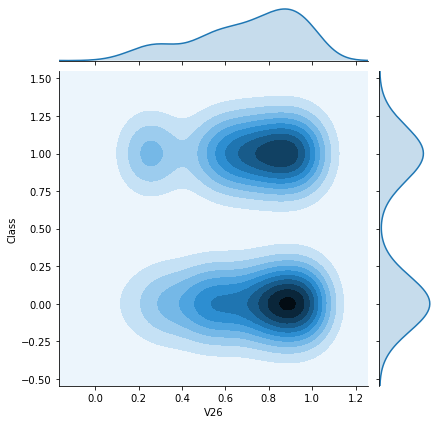

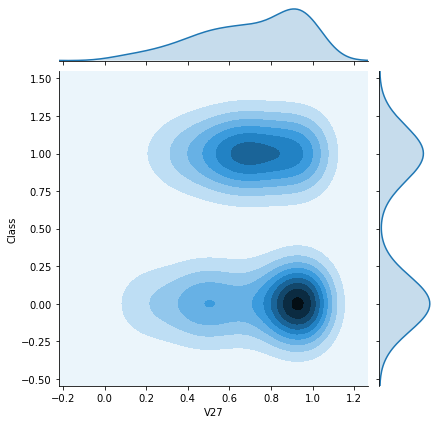

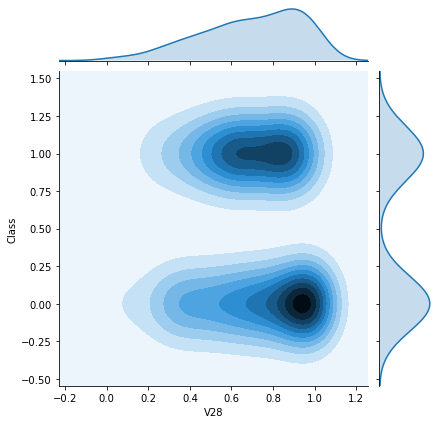

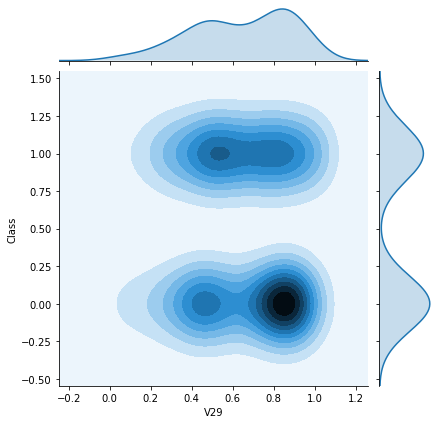

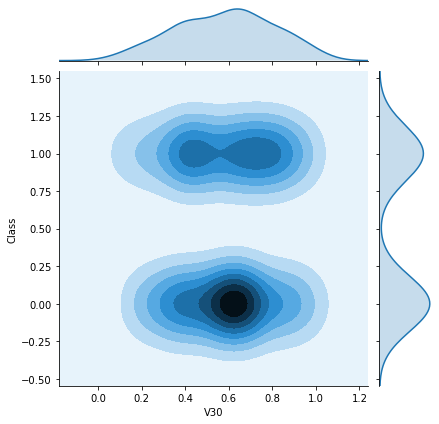

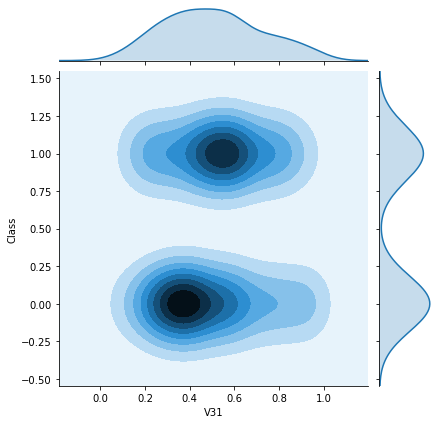

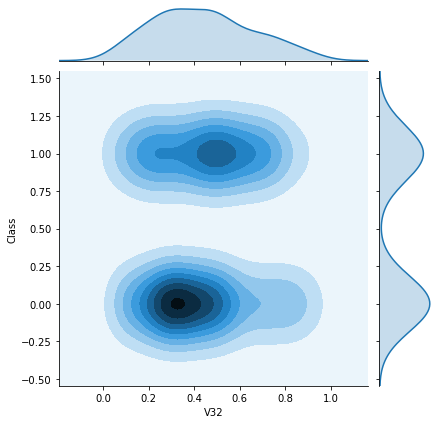

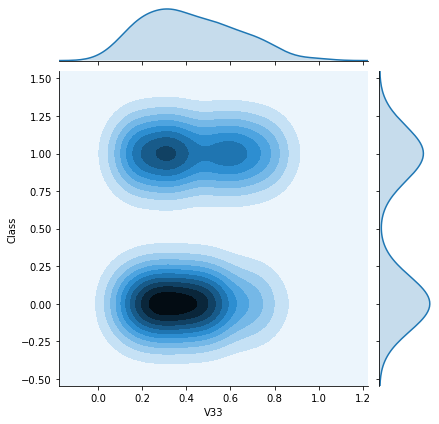

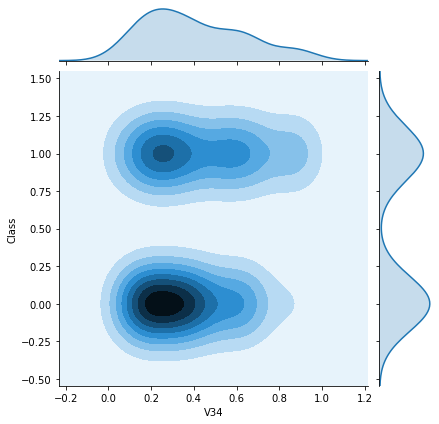

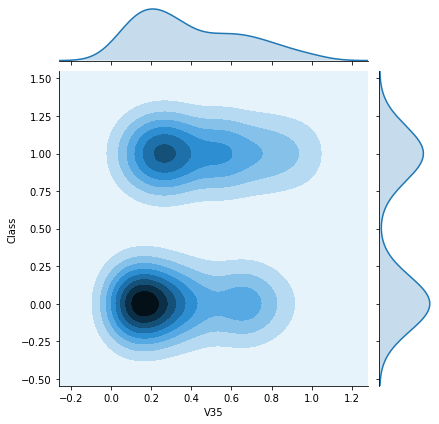

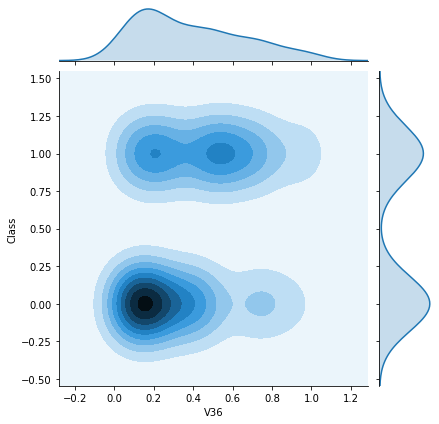

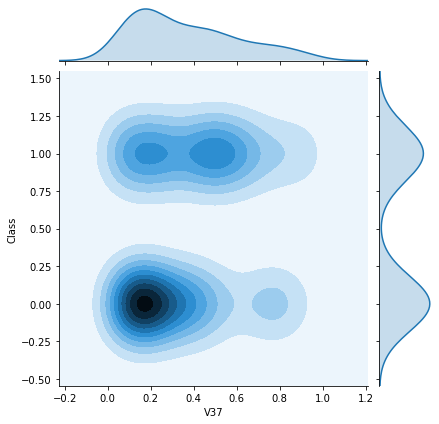

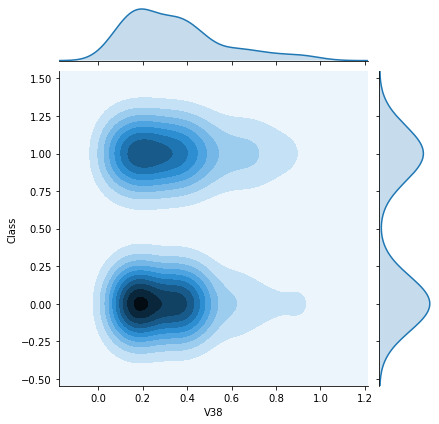

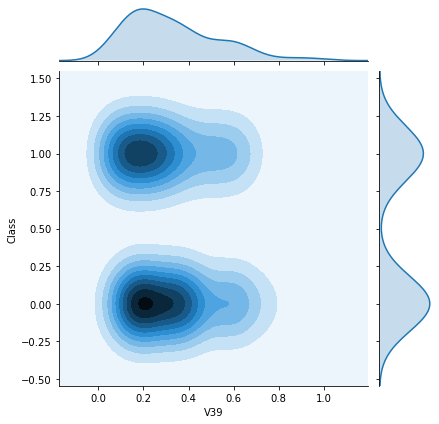

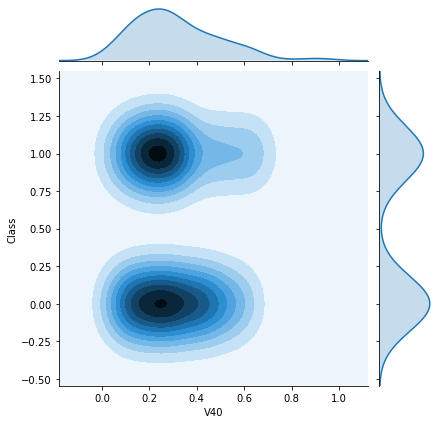

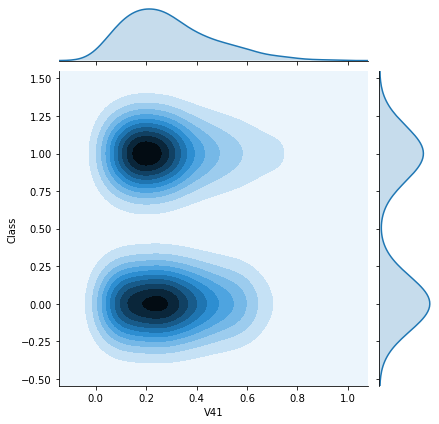

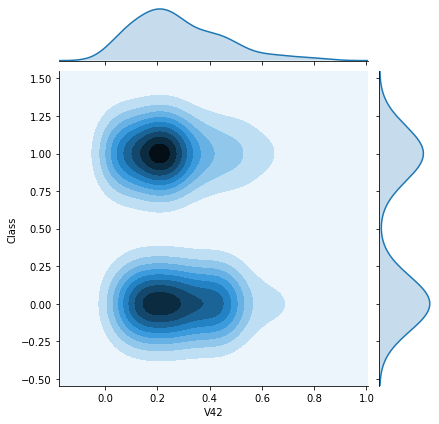

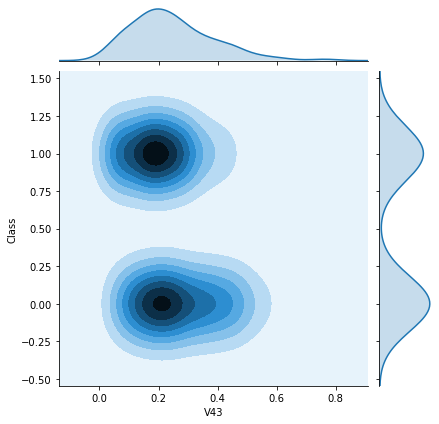

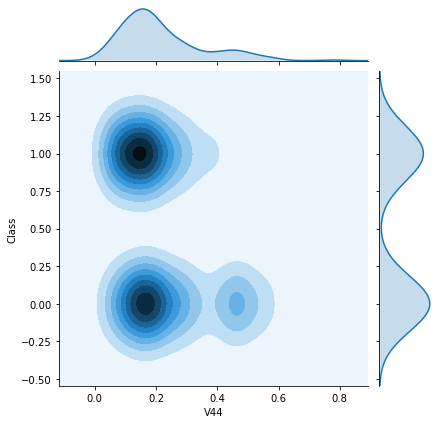

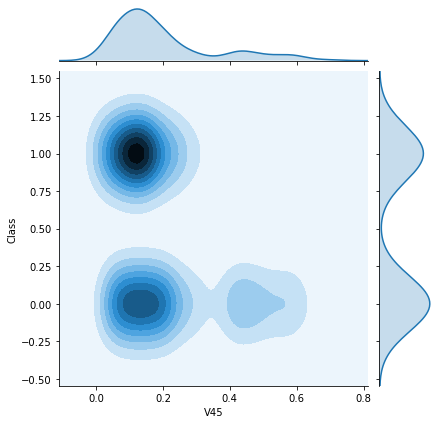

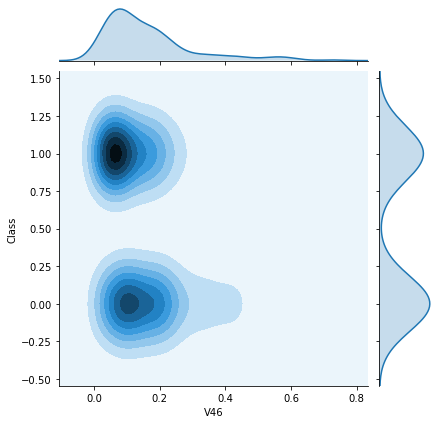

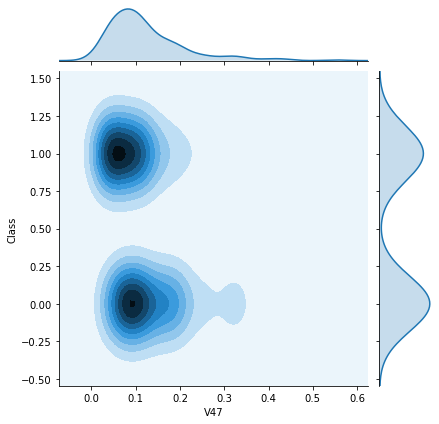

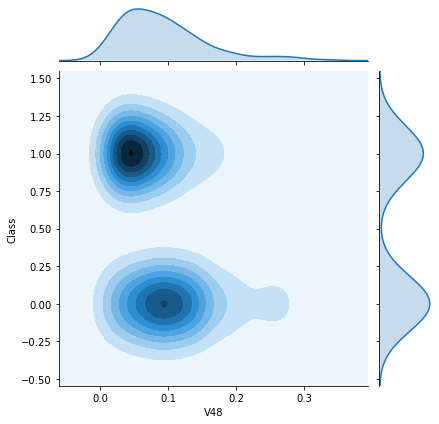

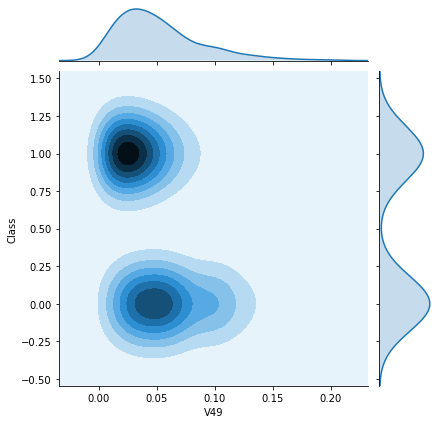

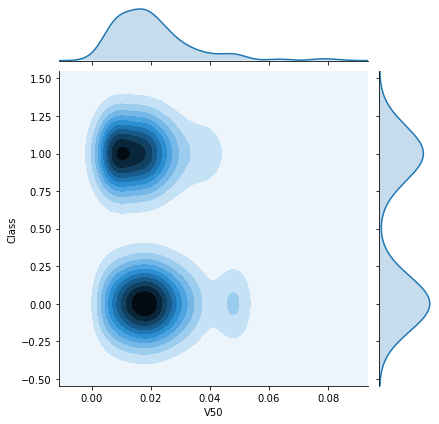

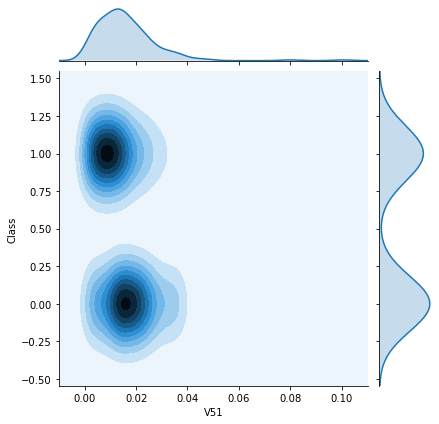

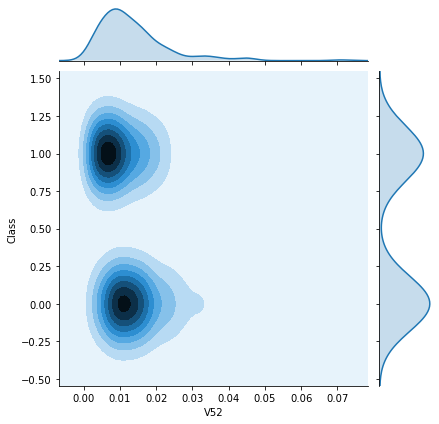

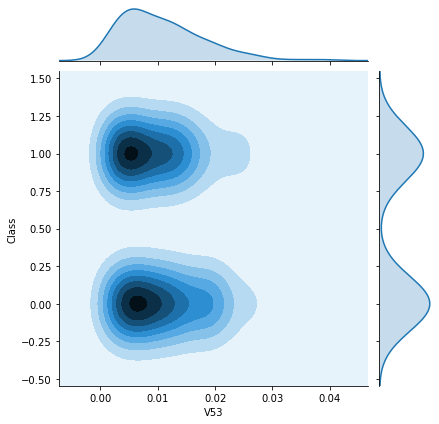

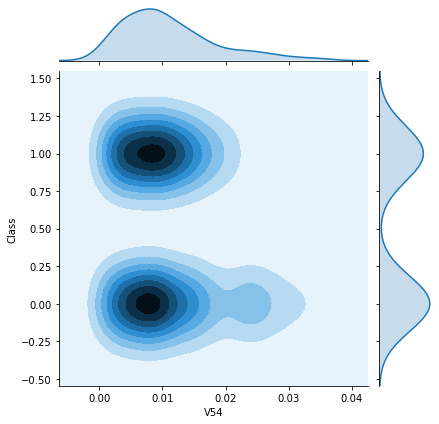

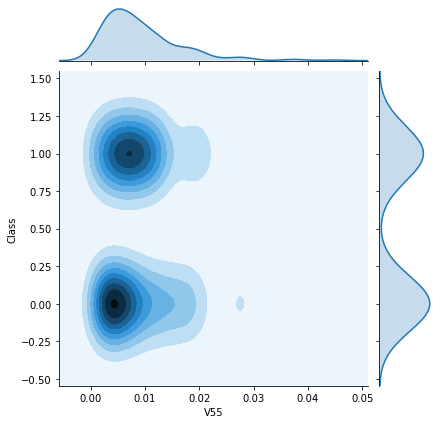

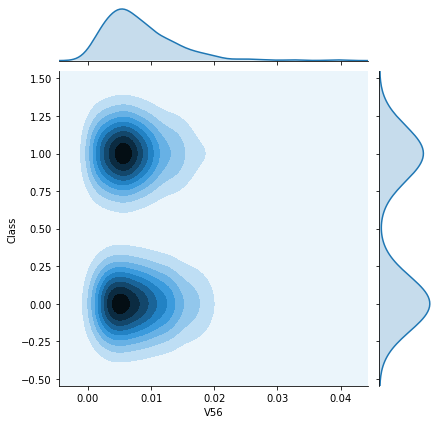

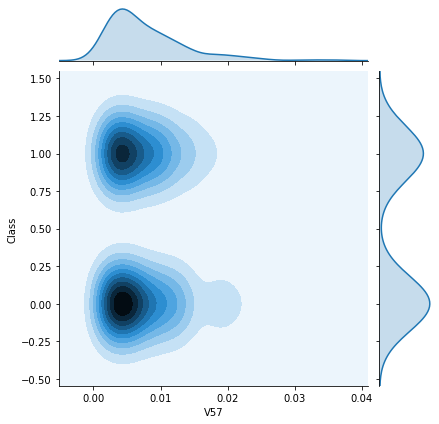

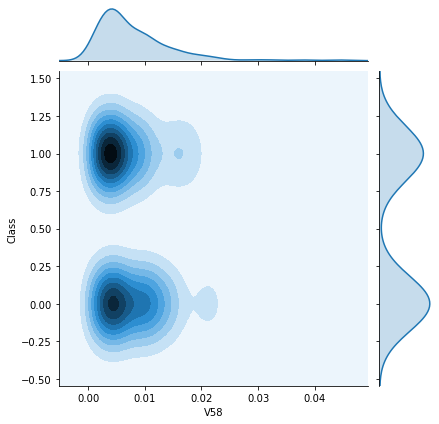

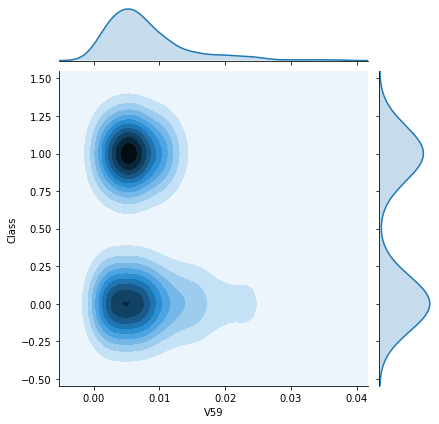

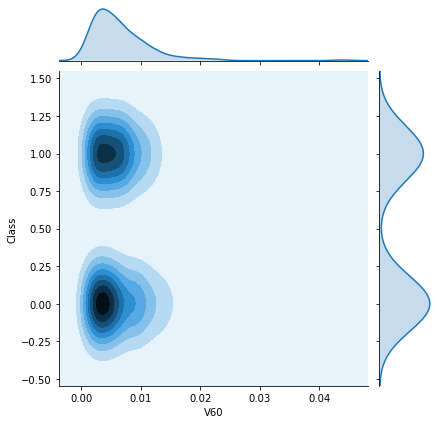

In [27]:
plt.figure(figsize=(15,50))
collist = x.columns.values
for i in range (0, len(collist)):
    sns.jointplot(x=df[collist[i]], y=df[target_variable], kind='kde')
    plt.show()


# Shuffeling the data Since data is following a pattern or sorted by Class Variable

In [28]:
from sklearn.utils import shuffle
df = shuffle(df)
df

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
153  0.0233  0.0394  0.0416  0.0547  0.0993  0.1515  0.1674  0.1513  0.1723   
194  0.0392  0.0108  0.0267  0.0257  0.0410  0.0491  0.1053  0.1690  0.2105   
183  0.0096  0.0404  0.0682  0.0688  0.0887  0.0932  0.0955  0.2140  0.2546   
73   0.0139  0.0222  0.0089  0.0108  0.0215  0.0136  0.0659  0.0954  0.0786   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
63   0.0067  0.0096  0.0024  0.0058  0.0197  0.0618  0.0432  0.0951  0.0836   
84   0.0378  0.0318  0.0423  0.0350  0.1787  0.1635  0.0887  0.0817  0.1779   
52   0.0087  0.0046  0.0081  0.0230  0.0586  0.0682  0.0993  0.0717  0.0576   
69   0.0216  0.0215  0.0273  0.0139  0.0357  0.0785  0.0906  0.0908  0.1151   
87   0.0856  0.0454  0.0382  0.0203  0.0385  0.0534  0.2140  0.3110  0.2837   

        V10  ...     V52     V53     V54     V55     V56     V57     V58  \
153  0.2078  ...  0.0104  0.0062  0.0026  0.0025  0.0061  0.0038  0.0101   
194  0.2471  ...  0.0083  0.0080  0.0026  0.0079  0.0042  0.0071  0.0044   
183  0.2952  ...  0.0237  0.0078  0.0144  0.0170  0.0012  0.0109  0.0036   
73   0.1015  ...  0.0062  0.0072  0.0113  0.0012  0.0022  0.0025  0.0059   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
63   0.1180  ...  0.0048  0.0023  0.0020  0.0040  0.0019  0.0034  0.0034   
84   0.2053  ...  0.0046  0.0044  0.0078  0.0102  0.0065  0.0061  0.0062   
52   0.0818  ...  0.0052  0.0038  0.0079  0.0114  0.0050  0.0030  0.0064   
69   0.0973  ...  0.0140  0.0044  0.0052  0.0073  0.0021  0.0047  0.0024   
87   0.2751  ...  0.0172  0.0138  0.0079  0.0037  0.0051  0.0258  0.0102   

        V59     V60  Class  
153  0.0078  0.0006      0  
194  0.0022  0.0014      0  
183  0.0043  0.0018      0  
73   0.0039  0.0048      1  
205  0.0077  0.0031      0  
..      ...     ...    ...  
63   0.0051  0.0031      1  
84   0.0043  0.0053      1  
52   0.0058  0.0030      1  
69   0.0009  0.0017      1  
87   0.0037  0.0037      1  

[208 rows x 61 columns]

In [29]:
x=df.drop(["Class"], axis = 1)
y=df.Class

# Correlation With Class variable

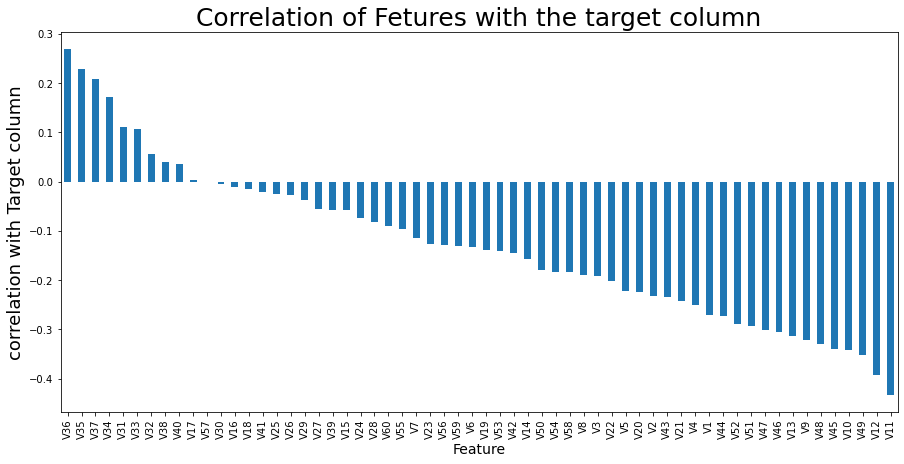

In [30]:
plt.figure(figsize=(15,7))
df.corr()["Class"].sort_values(ascending=False).drop(["Class"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

# Key observation:
    We have more negative correlation than the postive coreleation. 

# Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1)) 

In [32]:
X=scaler.fit_transform(x)

# Selecting Parameter for Training 


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [34]:
accu = 0
for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc> accu:
        accu= acc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}") 

Best Accuracy 90.38461538461539 found on randomstate 52


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = best_rstate)

# Selecting the Best model for Training

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, cross_val_score 
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# Baseline
             
             
             First, we are going to train a dummy classifier that we will use as a baseline with which to compare.

In [37]:
clf_dummy = DummyClassifier(strategy="uniform", random_state=42) # Random prediction
clf_dummy.fit(x_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [38]:
cross_val_score(clf_dummy, x_train, y_train, cv=5, scoring="accuracy", n_jobs=-1).mean()

0.4820564516129032

In [39]:
clf_dummy = DummyClassifier(strategy="most_frequent", random_state=42) 
clf_dummy.fit(x_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [40]:
cross_val_score(clf_dummy, x_train, y_train, cv=5, 
                scoring="accuracy", n_jobs=-1).mean()

0.5320564516129032

In [41]:
preds = cross_val_predict(clf_dummy, x_train, y_train, cv=5, n_jobs=-1)
conf_mx = metrics.confusion_matrix(y_train, preds)
conf_mx

array([[83,  0],
       [73,  0]], dtype=int64)

In [42]:
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted   0
Real         
0          83
1          73

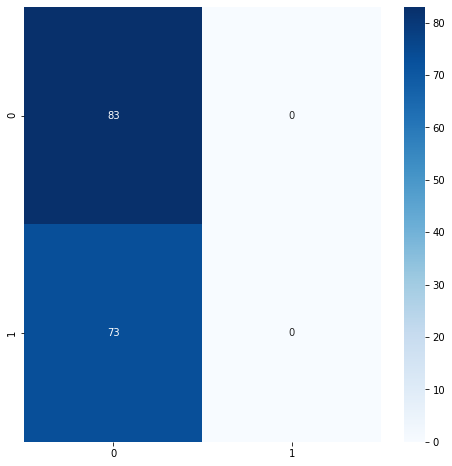

In [43]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=clf_dummy.classes_,
                 yticklabels=clf_dummy.classes_,cmap = "Blues")

In [44]:
accuracy_base = metrics.accuracy_score(y_train, preds)
precision_base = metrics.precision_score(y_train, preds, average='weighted', 
                                         zero_division=0)
recall_base = metrics.recall_score(y_train, preds, average='weighted')
f1_base = metrics.f1_score(y_train, preds, average='weighted')
print(f"Accuracy: {accuracy_base}")
print(f"Precision: {precision_base}")
print(f"Recall: {recall_base}")
print(f"f1: {f1_base}")

Accuracy: 0.532051282051282
Precision: 0.2830785667324129
Recall: 0.532051282051282
f1: 0.36954189464649717


In [45]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        83
           1       0.00      0.00      0.00        73

    accuracy                           0.53       156
   macro avg       0.27      0.50      0.35       156
weighted avg       0.28      0.53      0.37       156



In [46]:
def evaluate_model(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    
    accuracy, accuracy_std = scores['test_accuracy'].mean(), \
                                scores['test_accuracy'].std()
    
    precision, precision_std = scores['test_precision'].mean(), \
                                scores['test_precision'].std()
    
    recall, recall_std = scores['test_recall'].mean(), \
                                scores['test_recall'].std()
    
    f1, f1_std = scores['test_f1'].mean(), scores['test_f1'].std()

    
    result = {
        "Accuracy": accuracy,
        "Accuracy std": accuracy_std,
        "Precision": precision,
        "Precision std": precision_std,
        "Recall": recall,
        "Recall std": recall_std,
        "f1": f1,
        "f1 std": f1_std,
    }
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return result

In [47]:
models = [LogisticRegression(), GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier()]

model_names = ["LogisticRegression", "Naive Bayes Gaussian", "K Neighbors Classifier", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting", "XGBoost"]

In [48]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f".........................running {model_names[model]}")
    
    clf_scores = evaluate_model(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 9
.........................running LogisticRegression
Accuracy: 0.7629032258064516 - (std: 0.05577940795416319)
Precision: 0.7660357921648245 - (std: 0.055070090738153304)
Recall: 0.7629032258064516 - (std: 0.05577940795416319)
f1: 0.7616638439219084 - (std: 0.05604932972325819)


Step 2 of 9
.........................running Naive Bayes Gaussian
Accuracy: 0.7064516129032258 - (std: 0.11913667943625413)
Precision: 0.7143899889018734 - (std: 0.11577974887224435)
Recall: 0.7064516129032258 - (std: 0.11913667943625413)
f1: 0.7034054921392159 - (std: 0.12361334948402256)


Step 3 of 9
.........................running K Neighbors Classifier
Accuracy: 0.7627016129032258 - (std: 0.04426126493177847)
Precision: 0.7774710380875491 - (std: 0.04428163081471035)
Recall: 0.7627016129032258 - (std: 0.04426126493177847)
f1: 0.757880320804769 - (std: 0.045575217968423065)


Step 4 of 9
.........................running Random Forest
Accuracy: 0.76875 - (std: 0.05680906416296435)
Precision: 0

In [49]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

Model  accuracy  precision    recall        f1
8                 XGBoost  0.801210   0.804486  0.801210  0.800633
7       Gradient Boosting  0.801008   0.808513  0.801008  0.799022
6               Ada Boost  0.794556   0.798047  0.794556  0.793913
3           Random Forest  0.768750   0.774543  0.768750  0.766547
0      LogisticRegression  0.762903   0.766036  0.762903  0.761664
2  K Neighbors Classifier  0.762702   0.777471  0.762702  0.757880
4           Decision Tree  0.749798   0.754871  0.749798  0.747943
1    Naive Bayes Gaussian  0.706452   0.714390  0.706452  0.703405
5              Extra Tree  0.666129   0.675623  0.666129  0.659659

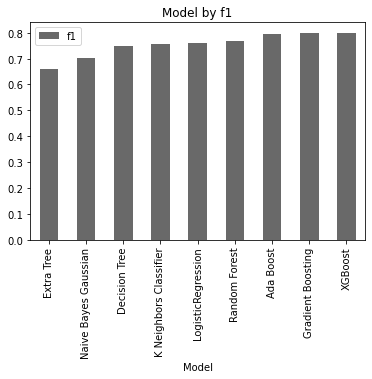

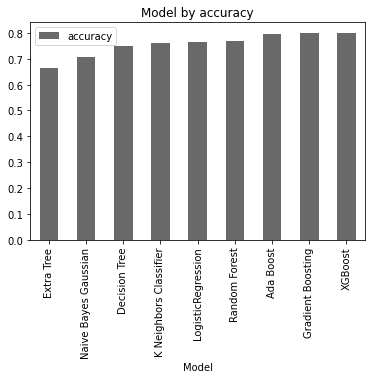

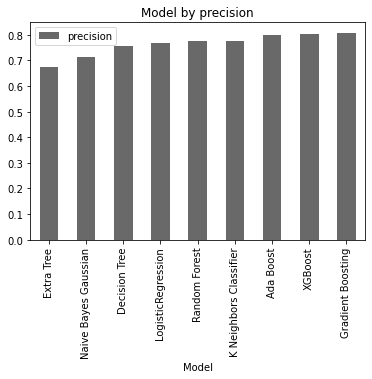

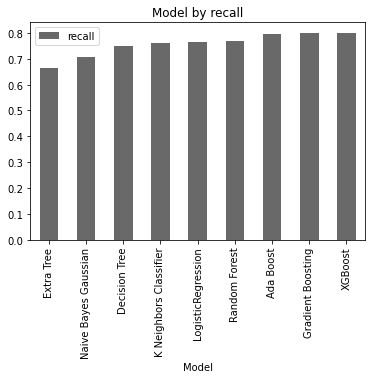

In [50]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = "#696969")
    plt.title(f"Model by {metric}")
    plt.show()

### Since XGB tops the chart with the following metrics we will Hyper tune Xgb to get better results.
#### XGBOOST
    1. accuracy  = 0.801363	
    2. precision = 0.804073
    3. recall    = 0.800363	         
    4. f1        = 0.801947


In [52]:
clf_xgb =  xgb.XGBClassifier()
preds = cross_val_predict(clf_xgb, x_train, y_train, cv=5, n_jobs=-1)

In [53]:
clf_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [54]:
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted   0   1
Real             
0          68  15
1          16  57

In [55]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        83
           1       0.79      0.78      0.79        73

    accuracy                           0.80       156
   macro avg       0.80      0.80      0.80       156
weighted avg       0.80      0.80      0.80       156



# HYPER TUNING....

In [56]:
param_grid = [
    {'learning_rate' : [1e-3, 1e-1, 'log-uniform'],
     'n_estimators': [100, 2000],
     'max_depth': [1, 10],
     'min_child_weight': [1, 6.],
     'gamma': [0, 0.5], 
     'subsample':[0.5, 1.], 
     'colsample_bytree': [0.5, 1.] 
    }
]


clf_xgb =  xgb.XGBClassifier()

In [57]:
clf_random = RandomizedSearchCV(clf_xgb, param_grid, n_iter = 200, cv = 5, 
                                scoring="f1_weighted", verbose=2, 
                                random_state=42, n_jobs = -1)

In [58]:
clf_random.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 953 out of 960 | elapsed:  4.2min remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  4.2min finished


[03:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [59]:
clf_random.best_params_

{'subsample': 1.0,
 'n_estimators': 2000,
 'min_child_weight': 1,
 'max_depth': 1,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.5}

In [60]:
clf_random.best_score_

0.8457795691396752

In [61]:
preds = cross_val_predict(clf_random.best_estimator_, x_train, y_train, cv=5, n_jobs=-1)
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        83
           1       0.85      0.82      0.83        73

    accuracy                           0.85       156
   macro avg       0.85      0.84      0.85       156
weighted avg       0.85      0.85      0.85       156



## After hyper tuning with RandomizedSearch-CV Xgb results are has follows.
#### XGBOOST
    1. accuracy  = 0.85    
    2. precision = 0.85
    3. recall    = 0.85             
    4. f1        = 0.85
    
      Unequivocally there is a little improvemet but also we will continue tuning with GridSearch CV

In [62]:
grid_search = GridSearchCV(clf_xgb, param_grid, cv=5,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [63]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  4.2min finished


[03:21:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [64]:
grid_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 2000,
 'subsample': 1.0}

In [65]:
grid_search.best_score_

0.8457795691396752

In [66]:
final_model = grid_search.best_estimator_
preds = cross_val_predict(final_model, x_train, y_train, cv=5, n_jobs=-1)
preds

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [67]:
pd.crosstab(y_train, preds, rownames = ['Actual'], colnames =['Predicted'])

Predicted   0   1
Actual           
0          72  11
1          13  60

In [68]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        83
           1       0.85      0.82      0.83        73

    accuracy                           0.85       156
   macro avg       0.85      0.84      0.85       156
weighted avg       0.85      0.85      0.85       156



In [69]:
y_pred = final_model.predict(x_test)

pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted   0   1
Actual           
0          26   2
1           4  20

In [70]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.91      0.83      0.87        24

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



In [71]:
conf_mx = metrics.confusion_matrix(y_test, y_pred)

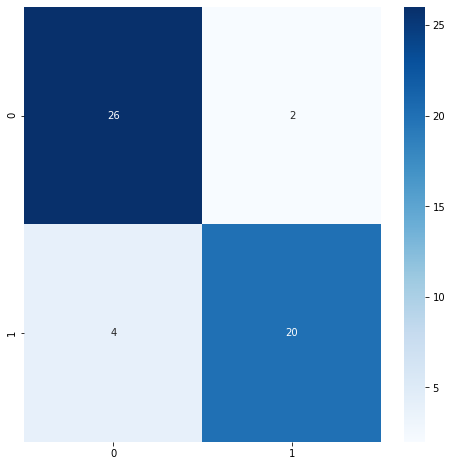

In [72]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=final_model.classes_,
                 yticklabels=final_model.classes_,
                cmap= "Blues")

# Feature importances¶


In [73]:
feature_importances = final_model.feature_importances_
feature_importances

array([0.01891226, 0.00095237, 0.00328027, 0.00758795, 0.05968463,
       0.        , 0.00360611, 0.        , 0.0931823 , 0.01007967,
       0.09475356, 0.05317624, 0.00170827, 0.        , 0.        ,
       0.06456571, 0.00030891, 0.0038523 , 0.00706593, 0.00163011,
       0.03692511, 0.01331085, 0.02165125, 0.00169832, 0.        ,
       0.00334159, 0.01211134, 0.06664283, 0.00858877, 0.00081544,
       0.01183658, 0.01322111, 0.00254026, 0.0006967 , 0.        ,
       0.03798233, 0.02025893, 0.00198359, 0.00901467, 0.00371653,
       0.00032136, 0.01898153, 0.01210113, 0.        , 0.04453989,
       0.00037251, 0.05183094, 0.00423644, 0.01327025, 0.00078587,
       0.04064601, 0.04442564, 0.00775964, 0.02497125, 0.00853338,
       0.00094738, 0.00081724, 0.00047854, 0.02344416, 0.01085402],
      dtype=float32)

In [74]:
selector = RFECV(final_model, step=1, cv=StratifiedKFold())
selector = selector.fit(x_train, y_train)


[03:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:22:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:23:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:23:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:23:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:23:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:23:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:24:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:24:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:25:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:25:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:25:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:25:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:25:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:27:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

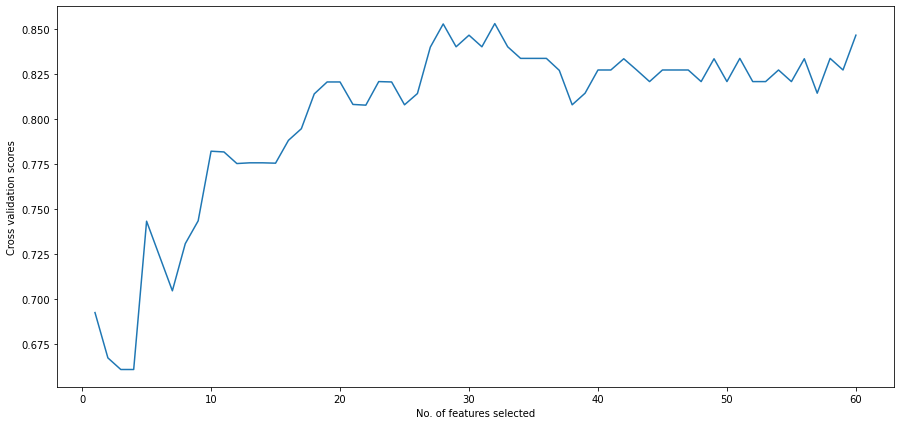

In [75]:
plt.figure(figsize=(15,7))
plt.xlabel("No. of features selected")
plt.ylabel("Cross validation scores")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [76]:
selector.grid_scores_

array([0.69233871, 0.6671371 , 0.66068548, 0.66068548, 0.74314516,
       0.72379032, 0.70443548, 0.73064516, 0.74334677, 0.78205645,
       0.78165323, 0.77520161, 0.77560484, 0.77560484, 0.77540323,
       0.78810484, 0.79455645, 0.81391129, 0.82056452, 0.82056452,
       0.80806452, 0.80766129, 0.82076613, 0.82056452, 0.8078629 ,
       0.8141129 , 0.83991935, 0.85282258, 0.84012097, 0.84657258,
       0.84012097, 0.85302419, 0.84012097, 0.83366935, 0.83366935,
       0.83366935, 0.82701613, 0.8078629 , 0.81431452, 0.82721774,
       0.82721774, 0.83346774, 0.82721774, 0.82076613, 0.82721774,
       0.82721774, 0.82721774, 0.82076613, 0.83346774, 0.82076613,
       0.83366935, 0.82076613, 0.82076613, 0.82721774, 0.82076613,
       0.83346774, 0.81431452, 0.83366935, 0.82721774, 0.84657258])

# Saving the final model

In [77]:
import joblib
joblib.dump(final_model,"RockvsMine.obj")

['RockvsMine.obj']

In [78]:
rockvsmine= joblib.load('RockvsMine.obj')
prediction = rockvsmine.predict(x_test)
prediction

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [79]:
print("Model Score test data :" ,rockvsmine.score(x_test,y_test))

Model Score test data : 0.8846153846153846


In [80]:
print("Accuracy score is :",accuracy_score(y_test,prediction))

Accuracy score is : 0.8846153846153846


# Conclusion:
     Post hyper tuning with Grid Search CV the metrisc has improved
     
        XGBOOST
          1. accuracy  = 0.85    
          2. precision = 0.85
          3. recall    = 0.85             
          4. f1        = 0.85

###  Its evident there is improvement in the model with the test variable scores as follows: 
  
        XGBOOST
          1. accuracy  = 0.88    
          2. precision = 0.88
          3. recall    = 0.88             
          4. f1        = 0.88  